# K조 : 세미 프로젝트
### 소상공인을 위한 서울시 지하철(1~8호선) 역내 상권 분석(2022)

##### **처리 사항**
1. 전체 역사 내 지하상가 임대 정보 분석
  - 공실 및 업종 분포 분석
  - 면적당 임대료 분석
2. 2022년 승하차 인원 분석
  - 승하차 인원이 가장 많은 10가지 역 확인
3. 역별 분석
  - 공실 및 업종 분포 분석
  - 면적당 임대료 분석
4. 시각화

##### **활용 데이터**
1) 메인 데이터
- 서울시 도시철도역사 지하상가 임대 현황_2022.csv(2022.09.01 최신화)
https://data.seoul.go.kr/dataList/OA-21305/S/1/datasetView.do 
- 서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.csv
http://data.seoul.go.kr/dataList/OA-12252/S/1/datasetView.do 

2) 보조 데이터
- CARD_SUBWAY_MONTH_2018.csv
- CARD_SUBWAY_MONTH_2019.csv
- CARD_SUBWAY_MONTH_2020.csv
- CARD_SUBWAY_MONTH_2021.csv
- CARD_SUBWAY_MONTH_2022.csv


http://data.seoul.go.kr/dataList/OA-12914/F/1/datasetView.do;jsessionid=7B6F14A61FD40E281D99A34CAA3680BB.new_portal-svr-11





## 변수 정리
- s_년도 : 해당 년도 서울지하철 총 승객수
- sub_all : 승하차인원 데이터(1~8호선만)
- sub : 승하차 인원(1~8호선) 총계 데이터
- total_2022 : 2022년 역별 지하철 승하차 인원 총계

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#한글 폰트 다운로드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-san

In [3]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
import pandas as pd
from pandas.io.formats.style_render import DataFrame
import numpy as np
import scipy.stats as stats


In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [5]:
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 100)

### 2018년~2022년 서울시 지하철 승하차 인원 분석

In [6]:
#2018년
s_2018 = pd.read_csv('/content/CARD_SUBWAY_MONTH_2018.csv', encoding='cp949')

#불필요한 컬럼 제거
s_2018=s_2018.drop(columns={'등록일자'})

#불필요한 행 제거
sub_list = ['1호선','2호선','3호선','4호선','5호선','6호선','7호선','8호선']
s_2018=s_2018[s_2018['노선명'].isin(sub_list)]
s_2018.head(5)


# 승차 승객수 합계
pd.options.display.float_format = '{:.5f}'.format

p_2018=s_2018['승차총승객수'].sum()
print(f'2018년 서울지하철 승객수는 {p_2018} 명' )

,사용일자,노선명,역명,승차총승객수,하차총승객수
0,20180101,1호선,서울역,40213.0,34505.0
56,20180101,8호선,모란,2488.0,2031.0
57,20180101,8호선,수진,2724.0,2518.0
58,20180101,8호선,신흥,2819.0,3028.0
59,20180101,8호선,단대오거리,5176.0,5200.0


2018년 서울지하철 승객수는 1741341028.0 명


In [7]:
#2019년
s_2019 = pd.read_csv('/content/CARD_SUBWAY_MONTH_2019.csv', encoding='cp949')

#불필요한 컬럼 제거
s_2019=s_2019.drop(columns={'등록일자'})

#불필요한 행 제거
sub_list = ['1호선','2호선','3호선','4호선','5호선','6호선','7호선','8호선']
s_2019=s_2019[s_2019['노선명'].isin(sub_list)]
s_2019.head(5)


# 승차 승객수 합계
pd.options.display.float_format = '{:.5f}'.format


p_2019=s_2019['승차총승객수'].sum()
print(f'2019년 서울지하철 승객수는 {p_2019} 명' )

,사용일자,노선명,역명,승차총승객수,하차총승객수
0,20190101,2호선,을지로4가,3862.00000,3728.00000
1,20190101,2호선,을지로3가,8104.00000,7554.00000
2,20190101,2호선,을지로입구,22478.00000,21330.00000
3,20190101,2호선,시청,8381.00000,6049.00000
4,20190101,1호선,동묘앞,8045.00000,8504.00000


2019년 서울지하철 승객수는 1759108989.0 명


In [8]:
with open('/content/CARD_SUBWAY_MONTH_2020.csv',encoding='cp949') as f:
    lines = f.readlines()
    
for line in lines[71418:71419]:
    print(len(line.split(',')))

6


In [9]:
#2020년

s_2020 = pd.read_csv('/content/CARD_SUBWAY_MONTH_2020.csv', encoding='cp949')

#불필요한 컬럼 제거
s_2020=s_2020.drop(columns={'등록일자'})

#불필요한 행 제거
sub_list = ['1호선','2호선','3호선','4호선','5호선','6호선','7호선','8호선']
s_2020=s_2018[s_2020['노선명'].isin(sub_list)]
s_2020.head(5)


# 승차 승객수 합계
pd.options.display.float_format = '{:.5f}'.format


p_2020=s_2020['승차총승객수'].sum()
print(f'2020년 서울지하철 승객수는 {p_2020} 명' )

<ipython-input-9-0886f2a56998>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  s_2020=s_2018[s_2020['노선명'].isin(sub_list)]


,사용일자,노선명,역명,승차총승객수,하차총승객수
0,20180101,1호선,서울역,40213.00000,34505.00000
67,20180101,8호선,석촌,3722.00000,4055.00000
68,20180101,8호선,잠실(송파구청),10875.00000,10885.00000
69,20180101,8호선,몽촌토성(평화의문),4438.00000,4142.00000
70,20180101,8호선,강동구청,4098.00000,4371.00000


2020년 서울지하철 승객수는 819074916.0 명


In [10]:
#2021년
s_2021 = pd.read_csv('/content/CARD_SUBWAY_MONTH_2021.csv', encoding='cp949')

#불필요한 컬럼 제거
s_2021=s_2021.drop(columns={'등록일자'})

#불필요한 행 제거
sub_list = ['1호선','2호선','3호선','4호선','5호선','6호선','7호선','8호선']
s_2021=s_2021[s_2021['노선명'].isin(sub_list)]
s_2021.head(5)

# 승차 승객수 합계
pd.options.display.float_format = '{:.5f}'.format

p_2021=s_2021['승차총승객수'].sum()
print(f'2021년 서울지하철 승객수는 {p_2021} 명' )

,사용일자,노선명,역명,승차총승객수,하차총승객수
2,20210101,3호선,을지로3가,1024,1009
3,20210101,3호선,종로3가,1255,1632
4,20210101,3호선,안국,2934,3029
35,20210101,4호선,명동,4270,4248
36,20210101,3호선,경복궁(정부서울청사),3541,3567


2021년 서울지하철 승객수는 1282935164 명


In [11]:
#2022년
s_2022 = pd.read_csv('/content/CARD_SUBWAY_MONTH_2022.csv', encoding='cp949')


#불필요한 컬럼 제거
s_2022=s_2022.drop(columns={'등록일자'})


#불필요한 행 제거
sub_list = ['1호선','2호선','3호선','4호선','5호선','6호선','7호선','8호선']
s_2022=s_2022[s_2022['사용일자'].isin(sub_list)]
s_2022.head()


# # 승차 승객수 합계
pd.options.display.float_format = '{:.5f}'.format

p_2022=s_2022['역명'].sum()
print(f'2022년 서울지하철 승객수는 {p_2022} 명' )

,사용일자,노선명,역명,승차총승객수,하차총승객수
20220101,3호선,수서,7370,7076,20220104
20220101,3호선,학여울,461,473,20220104
20220101,3호선,대청,3224,2903,20220104
20220101,3호선,일원,3321,2803,20220104
20220101,1호선,신설동,4939,4733,20220104


2022년 서울지하철 승객수는 1408378252 명


In [12]:
#2018~2022년 총 승하차 인원
data={'총 승하차 인원':[p_2018,p_2019,p_2020,p_2021,p_2022]}
passenger=pd.DataFrame(data=data,index=['2018','2019','2020','2021','2022'])
passenger

,총 승하차 인원
2018,1741341028.00000
2019,1759108989.00000
2020,819074916.00000
2021,1282935164.00000
2022,1408378252.00000


Text(0.5, 1.0, '연도별 지하철 승하차 인원 그래프')

Text(0.5, 0, '연도')

Text(0, 0.5, '승하차 인원')

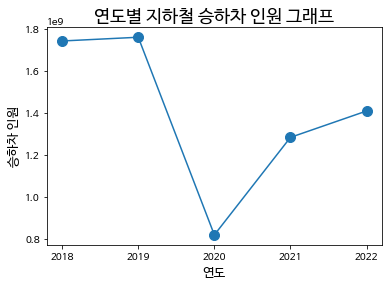

In [13]:
#2018~2022년 연도별 지하철 승하차 인원 비교
plt.plot(passenger.index,passenger.values,marker='o',markersize=10)
plt.title('연도별 지하철 승하차 인원 그래프',size=18)
plt.xlabel('연도',size=13)
plt.ylabel('승하차 인원',size=13)

## 1. 데이터 불러오기

In [14]:
#서울시 지하철 승하차 인원
sub_all = pd.read_csv('/content/서울시 지하철 원본.csv', encoding='cp949')
sub_all.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,08시-09시 승차인원,08시-09시 하차인원,09시-10시 승차인원,09시-10시 하차인원,...,21시-22시 승차인원,21시-22시 하차인원,22시-23시 승차인원,22시-23시 하차인원,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202301,1호선,동대문,717,11,9399,1791,7814,5063,11183,9014,16599,17592,15856,17949,...,11599,11037,8798,9563,4311,7667,529,2104,5,254,0,0,0,0,20230203
1,202301,1호선,동묘앞,176,5,2429,929,3063,4244,5788,6332,9991,14025,8011,13723,...,4077,5289,3044,5416,1264,3400,80,1320,3,330,0,0,0,0,20230203
2,202301,1호선,서울역,555,27,6560,7430,11059,41800,36434,93151,63029,202219,52580,139333,...,78469,35664,51553,24666,21933,12316,3388,2777,69,235,0,5,0,0,20230203
3,202301,1호선,시청,95,0,2103,3753,3123,19320,6859,60501,8173,184328,9615,82438,...,44866,7006,28432,4998,9485,3160,353,703,1,22,0,0,0,0,20230203
4,202301,1호선,신설동,273,6,7568,1962,8198,6829,18129,18696,27315,49942,17320,29873,...,11208,12550,7695,11005,3532,7998,319,1941,3,28,1,0,0,0,20230203


## 2. 데이터 살펴보기

#### 승하차 인원 데이터프레임 정보 확인 

In [15]:
sub_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56951 entries, 0 to 56950
Data columns (total 52 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   사용월           56951 non-null  int64 
 1   호선명           56951 non-null  object
 2   지하철역          56951 non-null  object
 3   04시-05시 승차인원  56951 non-null  int64 
 4   04시-05시 하차인원  56951 non-null  int64 
 5   05시-06시 승차인원  56951 non-null  int64 
 6   05시-06시 하차인원  56951 non-null  int64 
 7   06시-07시 승차인원  56951 non-null  int64 
 8   06시-07시 하차인원  56951 non-null  int64 
 9   07시-08시 승차인원  56951 non-null  int64 
 10  07시-08시 하차인원  56951 non-null  int64 
 11  08시-09시 승차인원  56951 non-null  int64 
 12  08시-09시 하차인원  56951 non-null  int64 
 13  09시-10시 승차인원  56951 non-null  int64 
 14  09시-10시 하차인원  56951 non-null  int64 
 15  10시-11시 승차인원  56951 non-null  int64 
 16  10시-11시 하차인원  56951 non-null  int64 
 17  11시-12시 승차인원  56951 non-null  int64 
 18  11시-12시 하차인원  56951 non-null  int64 
 19  12시-

In [16]:
sub_all.shape

(56951, 52)

In [17]:
sub_all.isna().sum()

사용월             0
호선명             0
지하철역            0
04시-05시 승차인원    0
04시-05시 하차인원    0
05시-06시 승차인원    0
05시-06시 하차인원    0
06시-07시 승차인원    0
06시-07시 하차인원    0
07시-08시 승차인원    0
07시-08시 하차인원    0
08시-09시 승차인원    0
08시-09시 하차인원    0
09시-10시 승차인원    0
09시-10시 하차인원    0
10시-11시 승차인원    0
10시-11시 하차인원    0
11시-12시 승차인원    0
11시-12시 하차인원    0
12시-13시 승차인원    0
12시-13시 하차인원    0
13시-14시 승차인원    0
13시-14시 하차인원    0
14시-15시 승차인원    0
14시-15시 하차인원    0
15시-16시 승차인원    0
15시-16시 하차인원    0
16시-17시 승차인원    0
16시-17시 하차인원    0
17시-18시 승차인원    0
17시-18시 하차인원    0
18시-19시 승차인원    0
18시-19시 하차인원    0
19시-20시 승차인원    0
19시-20시 하차인원    0
20시-21시 승차인원    0
20시-21시 하차인원    0
21시-22시 승차인원    0
21시-22시 하차인원    0
22시-23시 승차인원    0
22시-23시 하차인원    0
23시-24시 승차인원    0
23시-24시 하차인원    0
00시-01시 승차인원    0
00시-01시 하차인원    0
01시-02시 승차인원    0
01시-02시 하차인원    0
02시-03시 승차인원    0
02시-03시 하차인원    0
03시-04시 승차인원    0
03시-04시 하차인원    0
작업일자            0
dtype: int64

## 3. 데이터 수정

#### - 일별 합계 컬럼 추가

In [18]:
# 일별 합계 컬럼 추가
sub_all['승차총합'] = sub_all.loc[:,'04시-05시 승차인원':'03시-04시 하차인원':2].sum(axis=1)
sub_all['하차총합'] = sub_all.loc[:,'04시-05시 하차인원':'03시-04시 하차인원':2].sum(axis=1)
sub_all['총계'] = sub_all.loc[:,'04시-05시 승차인원':'03시-04시 하차인원'].sum(axis=1)
sub_all.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,08시-09시 승차인원,08시-09시 하차인원,09시-10시 승차인원,09시-10시 하차인원,...,22시-23시 하차인원,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자,승차총합,하차총합,총계
0,202301,1호선,동대문,717,11,9399,1791,7814,5063,11183,9014,16599,17592,15856,17949,...,9563,4311,7667,529,2104,5,254,0,0,0,0,20230203,314324,300305,614629
1,202301,1호선,동묘앞,176,5,2429,929,3063,4244,5788,6332,9991,14025,8011,13723,...,5416,1264,3400,80,1320,3,330,0,0,0,0,20230203,248403,257970,506373
2,202301,1호선,서울역,555,27,6560,7430,11059,41800,36434,93151,63029,202219,52580,139333,...,24666,21933,12316,3388,2777,69,235,0,5,0,0,20230203,1399616,1335301,2734917
3,202301,1호선,시청,95,0,2103,3753,3123,19320,6859,60501,8173,184328,9615,82438,...,4998,9485,3160,353,703,1,22,0,0,0,0,20230203,642685,653665,1296350
4,202301,1호선,신설동,273,6,7568,1962,8198,6829,18129,18696,27315,49942,17320,29873,...,11005,3532,7998,319,1941,3,28,1,0,0,0,20230203,361444,349207,710651


### 2) 불필요한 데이터 제거 및 필요한 데이터만 추출

#### - 불필요한 컬럼(작업일자) 및 불필요한 인덱스(호선) 제거

In [19]:
# 불필요한 컬럼(작업일자) 제거
sub_all = sub_all.drop(columns={'작업일자'})
sub_all.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,08시-09시 승차인원,08시-09시 하차인원,09시-10시 승차인원,09시-10시 하차인원,...,22시-23시 승차인원,22시-23시 하차인원,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,승차총합,하차총합,총계
0,202301,1호선,동대문,717,11,9399,1791,7814,5063,11183,9014,16599,17592,15856,17949,...,8798,9563,4311,7667,529,2104,5,254,0,0,0,0,314324,300305,614629
1,202301,1호선,동묘앞,176,5,2429,929,3063,4244,5788,6332,9991,14025,8011,13723,...,3044,5416,1264,3400,80,1320,3,330,0,0,0,0,248403,257970,506373
2,202301,1호선,서울역,555,27,6560,7430,11059,41800,36434,93151,63029,202219,52580,139333,...,51553,24666,21933,12316,3388,2777,69,235,0,5,0,0,1399616,1335301,2734917
3,202301,1호선,시청,95,0,2103,3753,3123,19320,6859,60501,8173,184328,9615,82438,...,28432,4998,9485,3160,353,703,1,22,0,0,0,0,642685,653665,1296350
4,202301,1호선,신설동,273,6,7568,1962,8198,6829,18129,18696,27315,49942,17320,29873,...,7695,11005,3532,7998,319,1941,3,28,1,0,0,0,361444,349207,710651


In [20]:
# 불필요한 행(호선) 제거
sub_list = ['1호선','2호선','3호선','4호선','5호선','6호선','7호선','8호선']
sub_all = sub_all[sub_all['호선명'].isin(sub_list)]
sub_all.tail(5)

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,08시-09시 승차인원,08시-09시 하차인원,09시-10시 승차인원,09시-10시 하차인원,...,22시-23시 승차인원,22시-23시 하차인원,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,승차총합,하차총합,총계
56672,201501,8호선,신흥,12,0,4740,767,7992,2157,16499,2875,21174,5525,13363,5320,...,3855,10467,1887,7312,316,2075,2,281,0,0,0,0,169629,174594,344223
56673,201501,8호선,암사,3,0,11287,982,22801,5615,74702,8837,99358,20186,50834,16259,...,7531,33771,3435,25441,738,6256,4,1036,0,0,0,0,540583,481213,1021796
56674,201501,8호선,잠실,19,0,1242,1466,2762,8509,6098,24328,8737,58215,7341,30858,...,19922,7039,8229,4366,1300,1691,2,35,0,0,0,0,325421,375076,700497
56675,201501,8호선,장지,0,0,2682,2225,8363,14583,23763,13851,32873,41268,19131,27128,...,17511,13814,5087,8208,753,2681,0,0,0,0,0,0,385076,370788,755864
56676,201501,8호선,천호,6,0,11039,1137,20905,12509,54706,19649,78308,37762,42085,32762,...,19410,34093,10381,22398,1930,7496,1,426,0,0,0,0,622031,673322,1295353


#### - 필요한 2022년 데이터만 추출

In [21]:
# 2022년/2023년 데이터 추출
sub_all.drop(sub_all[(sub_all['사용월'] <202200)].index,inplace = True)
sub = sub_all
sub.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,08시-09시 승차인원,08시-09시 하차인원,09시-10시 승차인원,09시-10시 하차인원,...,22시-23시 승차인원,22시-23시 하차인원,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,승차총합,하차총합,총계
0,202301,1호선,동대문,717,11,9399,1791,7814,5063,11183,9014,16599,17592,15856,17949,...,8798,9563,4311,7667,529,2104,5,254,0,0,0,0,314324,300305,614629
1,202301,1호선,동묘앞,176,5,2429,929,3063,4244,5788,6332,9991,14025,8011,13723,...,3044,5416,1264,3400,80,1320,3,330,0,0,0,0,248403,257970,506373
2,202301,1호선,서울역,555,27,6560,7430,11059,41800,36434,93151,63029,202219,52580,139333,...,51553,24666,21933,12316,3388,2777,69,235,0,5,0,0,1399616,1335301,2734917
3,202301,1호선,시청,95,0,2103,3753,3123,19320,6859,60501,8173,184328,9615,82438,...,28432,4998,9485,3160,353,703,1,22,0,0,0,0,642685,653665,1296350
4,202301,1호선,신설동,273,6,7568,1962,8198,6829,18129,18696,27315,49942,17320,29873,...,7695,11005,3532,7998,319,1941,3,28,1,0,0,0,361444,349207,710651


In [22]:
#2023 데이터 제외
sub_all.drop(sub_all[(sub_all['사용월'] == 202301)].index,inplace = True)
sub = sub_all
sub.head()


,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,08시-09시 승차인원,08시-09시 하차인원,09시-10시 승차인원,09시-10시 하차인원,...,22시-23시 승차인원,22시-23시 하차인원,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,승차총합,하차총합,총계
612,202212,1호선,동대문,762,8,10546,1950,8505,5809,13440,10380,18824,19859,18641,21156,...,10411,11303,4793,8824,588,2402,23,254,1,4,0,0,350825,334703,685528
613,202212,1호선,동묘앞,194,5,2748,1031,3605,4484,6064,8011,10633,19614,8934,16106,...,3394,6372,1358,3859,122,1683,2,453,0,36,0,0,271558,281688,553246
614,202212,1호선,서울역,604,24,8028,7918,12137,44148,38148,100206,66885,212880,57091,153222,...,59774,30941,26461,15356,2776,3500,43,707,1,46,0,0,1547314,1504096,3051410
615,202212,1호선,시청,127,1,2197,4277,3713,21598,7195,61522,9565,191043,11529,93176,...,39531,6960,13533,4727,1934,1126,102,110,2,7,0,0,769469,758781,1528250
616,202212,1호선,신설동,348,13,8308,2096,8716,7826,20270,21977,30116,55144,19563,32225,...,9080,12773,3964,9203,393,2276,13,85,0,6,0,0,402903,387732,790635


#### - 필요한 컬럼 데이터만 추출

In [23]:
# 필요한 컬럼만 남기기
sub = sub[['사용월', '호선명', '지하철역', '승차총합', '하차총합','총계']]
sub.head()

,사용월,호선명,지하철역,승차총합,하차총합,총계
612,202212,1호선,동대문,350825,334703,685528
613,202212,1호선,동묘앞,271558,281688,553246
614,202212,1호선,서울역,1547314,1504096,3051410
615,202212,1호선,시청,769469,758781,1528250
616,202212,1호선,신설동,402903,387732,790635


### 3) 데이터 확인

In [24]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3362 entries, 612 to 7638
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용월     3362 non-null   int64 
 1   호선명     3362 non-null   object
 2   지하철역    3362 non-null   object
 3   승차총합    3362 non-null   int64 
 4   하차총합    3362 non-null   int64 
 5   총계      3362 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 183.9+ KB


In [25]:
sub.shape

(3362, 6)

In [26]:
sub.index

Int64Index([ 612,  613,  614,  615,  616,  617,  618,  619,  620,  621,
            ...
            7629, 7630, 7631, 7632, 7633, 7634, 7635, 7636, 7637, 7638],
           dtype='int64', length=3362)

In [27]:
sub.columns

Index(['사용월', '호선명', '지하철역', '승차총합', '하차총합', '총계'], dtype='object')

In [28]:
#2022년 지하철 승하차 인원 총계
total_2022=sub.groupby(['지하철역'])
total_2022=total_2022.agg(sum)
total_2022.drop(labels='사용월',axis=1,inplace=True)

#내림차순
total_2022 = total_2022.sort_values('총계',ascending=False).head(15)
total_2022.reset_index(inplace=True)
total_2022

,지하철역,승차총합,하차총합,총계
0,잠실(송파구청),30095803,30528225,60624028
1,강남,26144333,25620317,51764650
2,홍대입구,20953932,22300019,43253951
3,사당,21436960,21468356,42905316
4,고속터미널,21642316,20029719,41672035
5,서울역,19177152,21166347,40343499
6,신림,19946559,19238017,39184576
7,구로디지털단지,18450835,18369622,36820457
8,건대입구,16630418,17759869,34390287
9,역삼,16806757,16877761,33684518


## 지하상가 임대 정보

- ug :  지하상가 파일 원본

- ug_1 : ug의 불필요한 columns 제거

- ug_3 : ug_1에서 면적당 월 임대료를 추가한 데이터

- cost_지하철역 : 면적당 월 임대료가 추가된 데이터

- 각 업종 변수는 ug_영업 업종/ug_지하철역_영업업종 으로 설정


In [29]:
ug= pd.read_csv("/content/서울교통공사_지하상가임대정보_20220315.csv", encoding='cp949')
ug.head()

print('\n')
ug.tail()

,연번,상가유형,호선,역사명,상가번호,면적(제곱미터),영업업종,계약시작일자,계약종료일자,월임대료
0,1,개별(일반),1,서울(1)역,150-107,33.00000,사무실,2019-05-08,2024-06-06,527100.00000
1,2,개별(일반),1,시청(1)역,151-101,29.73000,의류,2017-04-04,2022-05-03,3858954.00000
2,3,개별(일반),1,시청(1)역,151-103,57.60000,기타,2020-02-01,2025-01-31,1858300.00000
3,4,개별(일반),1,시청(1)역,151-104,25.00000,플라워,2020-12-31,2026-01-30,2470600.00000
4,5,네트워크,1,시청(1)역,151-105,25.00000,식음료,2021-06-03,2026-08-02,4145884.00000


,연번,상가유형,호선,역사명,상가번호,면적(제곱미터),영업업종,계약시작일자,계약종료일자,월임대료
1581,1582,개별(일반),8,단대오거리역,823-203,54.03000,식음료,2018-08-31,2023-09-29,7630000.00000
1582,1583,개별(일반),8,단대오거리역,823-204,75.09000,의류,2021-03-18,2026-04-17,3780000.00000
1583,1584,네트워크,8,신흥역,824-101,40.00000,편의점,2022-02-03,2027-05-04,6124682.00000
1584,1585,네트워크,8,수진역,825-101,40.00000,편의점,2022-02-03,2027-05-04,5575875.00000
1585,1586,네트워크,8,모란역,826-101,50.00000,편의점,2022-02-03,2027-05-04,5831070.00000


In [30]:
ug.describe()

,연번,호선,면적(제곱미터),월임대료
count,1586.00000,1586.00000,1527.00000,1149.00000
mean,793.50000,4.82472,50.57593,6180317.67972
std,457.98308,1.96776,206.66927,14017130.30795
min,1.00000,1.00000,7.61000,153600.00000
25%,397.25000,3.00000,22.00000,2124009.00000
50%,793.50000,5.00000,31.64000,3861593.00000
75%,1189.75000,7.00000,44.00000,6806251.00000
max,1586.00000,8.00000,7475.19000,284622927.00000


In [31]:
#데이터 크기 
ug.shape

print('\n')
#데이터 열의 종류
ug.columns

print('\n')
#데이터 정보
ug.info()

(1586, 10)

Index(['연번', '상가유형', '호선', '역사명', '상가번호', '면적(제곱미터)', '영업업종', '계약시작일자',
       '계약종료일자', '월임대료'],
      dtype='object')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586 entries, 0 to 1585
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   연번        1586 non-null   int64  
 1   상가유형      1586 non-null   object 
 2   호선        1586 non-null   int64  
 3   역사명       1586 non-null   object 
 4   상가번호      1586 non-null   object 
 5   면적(제곱미터)  1527 non-null   float64
 6   영업업종      1164 non-null   object 
 7   계약시작일자    1376 non-null   object 
 8   계약종료일자    1376 non-null   object 
 9   월임대료      1149 non-null   float64
dtypes: float64(2), int64(2), object(6)
memory usage: 124.0+ KB


## 분석의 필요한 신규 데이터 생성 및 결측치 확인

In [32]:
ug_1 = ug[['연번','상가유형','호선','역사명','영업업종','면적(제곱미터)','월임대료']]
ug_1.head()
print('\n')

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료
0,1,개별(일반),1,서울(1)역,사무실,33.00000,527100.00000
1,2,개별(일반),1,시청(1)역,의류,29.73000,3858954.00000
2,3,개별(일반),1,시청(1)역,기타,57.60000,1858300.00000
3,4,개별(일반),1,시청(1)역,플라워,25.00000,2470600.00000
4,5,네트워크,1,시청(1)역,식음료,25.00000,4145884.00000


In [33]:
ug_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586 entries, 0 to 1585
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   연번        1586 non-null   int64  
 1   상가유형      1586 non-null   object 
 2   호선        1586 non-null   int64  
 3   역사명       1586 non-null   object 
 4   영업업종      1164 non-null   object 
 5   면적(제곱미터)  1527 non-null   float64
 6   월임대료      1149 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 86.9+ KB


In [34]:
ug_1.describe()

,연번,호선,면적(제곱미터),월임대료
count,1586.00000,1586.00000,1527.00000,1149.00000
mean,793.50000,4.82472,50.57593,6180317.67972
std,457.98308,1.96776,206.66927,14017130.30795
min,1.00000,1.00000,7.61000,153600.00000
25%,397.25000,3.00000,22.00000,2124009.00000
50%,793.50000,5.00000,31.64000,3861593.00000
75%,1189.75000,7.00000,44.00000,6806251.00000
max,1586.00000,8.00000,7475.19000,284622927.00000


In [35]:
ug_1.isnull().sum()

연번            0
상가유형          0
호선            0
역사명           0
영업업종        422
면적(제곱미터)     59
월임대료        437
dtype: int64

In [36]:
#NAN은 공실상태, 공실로  변경
ug_1['영업업종'] = ug_1['영업업종'].fillna('공실')
ug_1

<ipython-input-36-36235a34c1c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ug_1['영업업종'] = ug_1['영업업종'].fillna('공실')


,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료
0,1,개별(일반),1,서울(1)역,사무실,33.00000,527100.00000
1,2,개별(일반),1,시청(1)역,의류,29.73000,3858954.00000
2,3,개별(일반),1,시청(1)역,기타,57.60000,1858300.00000
3,4,개별(일반),1,시청(1)역,플라워,25.00000,2470600.00000
4,5,네트워크,1,시청(1)역,식음료,25.00000,4145884.00000
...,...,...,...,...,...,...,...
1581,1582,개별(일반),8,단대오거리역,식음료,54.03000,7630000.00000
1582,1583,개별(일반),8,단대오거리역,의류,75.09000,3780000.00000
1583,1584,네트워크,8,신흥역,편의점,40.00000,6124682.00000
1584,1585,네트워크,8,수진역,편의점,40.00000,5575875.00000


## 면적, 월임대료 데이터 결측치 수정 및 확인  
- 면적과 월임대료의 결측치를 각 역의 면적과 월임대료의 평균값으로 대체
- 상가의 면적대비 월임대료(면적당 원임대료) 컬럼 추가

In [37]:
list_역사명 = []
for i in ug_1.역사명:
  if i not in list_역사명:
    list_역사명.append(i)
list_역사명
ug_1_group = ug_1.groupby('역사명')

['서울(1)역',
 '시청(1)역',
 '종각역',
 '종로3가(1)역',
 '종로5가역',
 '동묘앞(1)역',
 '을지로입구역',
 '을지로3가(2)역',
 '을지로4가(2)역',
 '동대문역사문화공원(2)역',
 '신당(2)역',
 '상왕십리역',
 '왕십리(2)역',
 '한양대역',
 '뚝섬역',
 '성수역',
 '건대입구(2)역',
 '구의역',
 '강변역',
 '잠실나루역',
 '잠실(2)역',
 '잠실새내역',
 '종합운동장역',
 '선릉역',
 '역삼역',
 '강남역',
 '교대(2)역',
 '서초역',
 '방배역',
 '사당(2)역',
 '낙성대역',
 '서울대입구역',
 '봉천역',
 '신림역',
 '신대방역',
 '구로디지털단지역',
 '대림(2)역',
 '신도림역',
 '문래역',
 '영등포구청(2)역',
 '당산역',
 '합정(2)역',
 '홍대입구역',
 '신촌역',
 '이대역',
 '아현역',
 '충정로(2)역',
 '양천구청역',
 '신정네거리역',
 '연신내(3)역',
 '불광(3)역',
 '녹번역',
 '홍제역',
 '경복궁역',
 '안국역',
 '종로3가(3)역',
 '을지로3가(3)역',
 '동대입구역',
 '약수(3)역',
 '금호역',
 '옥수역',
 '압구정역',
 '신사역',
 '고속터미널(3)역',
 '교대(3)역',
 '양재역',
 '매봉역',
 '도곡역',
 '대청역',
 '일원역',
 '수서역',
 '가락시장(3)역',
 '경찰병원역',
 '당고개역',
 '상계역',
 '노원(4)역',
 '창동역',
 '수유역',
 '미아사거리역',
 '길음역',
 '성신여대입구역',
 '한성대입구역',
 '혜화역',
 '동대문(4)역',
 '동대문역사문화공원(4)역',
 '충무로(4)역',
 '명동역',
 '회현역',
 '숙대입구역',
 '신용산역',
 '이촌역',
 '동작역',
 '총신대입구역',
 '사당(4)역',
 '방화역',
 '개화산역',
 '김포공항역',
 '송정역',
 '발산역',
 '우장산역',
 '화곡역',

In [38]:
list_dataframe =[]
for i in list_역사명:
  group_data = ug_1_group.get_group(i)
  # print(f'\n{i}의 상가 정보\n')
  group_data.월임대료 = group_data.월임대료.fillna(group_data.월임대료.mean())
  group_data['면적(제곱미터)'] = group_data['면적(제곱미터)'].fillna(group_data['면적(제곱미터)'].mean())
  group_data['면적당 월임대료'] = (group_data['월임대료']/group_data['면적(제곱미터)'])
  pd.options.display.float_format = '{:.2f}'.format
  group_data = group_data.round()
  # group_data
  for frame in range(len(group_data)):
    list = group_data.iloc[[frame], :]
    list_dataframe.append(list)
ug_1 = pd.concat(list_dataframe)
ug_1

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-38-274f3407da52>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['면적(제곱미터)'] = group_data['면적(제곱미터)'].fillna(group_data['면적(제곱미터)'].mean())
<ipython-input-38-274f3407da52>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,1,개별(일반),1,서울(1)역,사무실,33.00,527100.00,15973.00
1,2,개별(일반),1,시청(1)역,의류,30.00,3858954.00,129800.00
2,3,개별(일반),1,시청(1)역,기타,58.00,1858300.00,32262.00
3,4,개별(일반),1,시청(1)역,플라워,25.00,2470600.00,98824.00
4,5,네트워크,1,시청(1)역,식음료,25.00,4145884.00,165835.00
...,...,...,...,...,...,...,...,...
1581,1582,개별(일반),8,단대오거리역,식음료,54.00,7630000.00,141218.00
1582,1583,개별(일반),8,단대오거리역,의류,75.00,3780000.00,50340.00
1583,1584,네트워크,8,신흥역,편의점,40.00,6124682.00,153117.00
1584,1585,네트워크,8,수진역,편의점,40.00,5575875.00,139397.00


In [39]:
len(set(ug_1['역사명']))

236

In [40]:
set(ug_1['역사명'])

{'가락시장(3)역',
 '가락시장(8)역',
 '가산디지털단지역',
 '강남구청역',
 '강남역',
 '강동구청역',
 '강동역',
 '강변역',
 '개롱역',
 '개화산역',
 '거여역',
 '건대입구(2)역',
 '건대입구(7)역',
 '경복궁역',
 '경찰병원역',
 '고덕역',
 '고려대역',
 '고속터미널(3)역',
 '고속터미널(7)역',
 '공덕(5)역',
 '공덕(6)역',
 '공릉역',
 '광나루역',
 '광명사거리역',
 '광화문역',
 '광흥창역',
 '교대(2)역',
 '교대(3)역',
 '구로디지털단지역',
 '구산역',
 '구의역',
 '군자(5)역',
 '군자(7)역',
 '굽은다리역',
 '금호역',
 '길동역',
 '길음역',
 '김포공항역',
 '까치산(5)역',
 '낙성대역',
 '남구로역',
 '남성역',
 '남한산성입구역',
 '내방역',
 '노원(4)역',
 '노원(7)역',
 '녹번역',
 '녹사평역',
 '논현역',
 '단대오거리역',
 '답십리역',
 '당고개역',
 '당산역',
 '대림(2)역',
 '대림(7)역',
 '대청역',
 '대흥역',
 '도곡역',
 '도봉산역',
 '독바위역',
 '돌곶이역',
 '동대문(4)역',
 '동대문역사문화공원(2)역',
 '동대문역사문화공원(4)역',
 '동대입구역',
 '동묘앞(1)역',
 '동묘앞(6)역',
 '동작역',
 '둔촌동역',
 '디지털미디어시티역',
 '뚝섬역',
 '뚝섬유원지역',
 '마들역',
 '마장역',
 '마천역',
 '마포구청역',
 '마포역',
 '망원역',
 '매봉역',
 '먹골역',
 '면목역',
 '명동역',
 '명일역',
 '모란역',
 '목동역',
 '몽촌토성역',
 '문래역',
 '문정역',
 '미아사거리역',
 '반포역',
 '발산역',
 '방배역',
 '방이역',
 '방화역',
 '버티고개역',
 '보라매역',
 '보문역',
 '복정역',
 '봉천역',
 '봉화산역',
 '불광(3)역',
 '불광(6)역',
 '사가정역',
 '사당

In [41]:
set(ug_1['영업업종'])
print('\n')
len(set(ug_1['영업업종']))

{'공실',
 '공유오피스',
 '기타',
 '사무실',
 '식음료',
 '액세서리',
 '의류',
 '의약업',
 '제과',
 '편의점',
 '플라워',
 '화장품'}

12

## 역별 공실 개수

-각 지하철 역 내 공실 데이터 추출

-잠실
-강남
-홍대입구
-사당
-고속터미널
-서울역
-신림
-구로디지털단지
-건대입구
-역삼
-순서로 분석함

In [42]:
#공실
ug_공실 = ug_1[ug_1['영업업종'] == '공실']
ug_공실.reset_index(inplace=True, drop=True)
ug_공실
print('\n')
print(f"서울시 지하철 내 지하상가 공실 개수는? : {len(ug_공실)}개")

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,8,공실,1,종각역,공실,37.00,5428586.00,147316.00
1,9,공실,1,종각역,공실,19.00,5428586.00,291233.00
2,11,공실,1,종각역,공실,31.00,5428586.00,176827.00
3,14,공실,1,종각역,공실,42.00,5428586.00,129252.00
4,16,공실,1,종각역,공실,16.00,5428586.00,336135.00
...,...,...,...,...,...,...,...,...
417,1528,공실,8,강동구청역,공실,37.00,4509836.00,122019.00
418,1562,공실,8,가락시장(8)역,공실,30.00,3616269.00,118800.00
419,1576,공실,8,남한산성입구역,공실,55.00,4555150.00,83184.00
420,1578,공실,8,남한산성입구역,공실,17.00,4555150.00,267950.00




서울시 지하철 내 지하상가 공실 개수는? : 422개


In [43]:
#1.잠실(2,8)
ug_공실_잠실 = ug_공실[ug_공실['역사명'].str.contains('잠실()', na = False)]
ug_공실_잠실.reset_index(inplace=True, drop=True)
ug_공실_잠실

<ipython-input-43-eb8d7bee51c5>:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  ug_공실_잠실 = ug_공실[ug_공실['역사명'].str.contains('잠실()', na = False)]


,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,122,공실,2,잠실(2)역,공실,21.00,7065146.00,339344.00
1,124,공실,2,잠실(2)역,공실,10.00,7065146.00,676090.00


In [44]:
#2.강남
ug_공실_강남 = ug_공실[ug_공실['역사명'] == '강남역']
ug_공실_강남.reset_index(inplace=True, drop=True)
ug_공실_강남

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,169,공실,2,강남역,공실,13.00,17193026.00,1292709.00
1,170,공실,2,강남역,공실,27.00,17193026.00,646354.00


In [45]:
#3.홍대입구
ug_공실_홍대입구 = ug_공실[ug_공실['역사명'] == '홍대입구역']
ug_공실_홍대입구.reset_index(inplace=True, drop=True)
ug_공실_홍대입구

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료


In [46]:
#4.사당(2,4)
ug_공실_사당 = ug_공실[ug_공실['역사명'].str.contains('사당()', na = False)]
ug_공실_사당.reset_index(inplace=True, drop=True)
ug_공실_사당

<ipython-input-46-7b6cc8f9e4d5>:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  ug_공실_사당 = ug_공실[ug_공실['역사명'].str.contains('사당()', na = False)]


,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,197,공실,2,사당(2)역,공실,20.00,11514722.00,561694.00
1,620,공실,4,사당(4)역,공실,31.00,9966789.00,324651.00
2,624,공실,4,사당(4)역,공실,31.00,9966789.00,324651.00


In [47]:
#5. 고속터미널(3,7)
ug_공실_고속터미널 = ug_공실[ug_공실['역사명'].str.contains('고속터미널()', na = False)]
ug_공실_고속터미널.reset_index(inplace=True, drop=True)
ug_공실_고속터미널

<ipython-input-47-7acb2ac67394>:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  ug_공실_고속터미널 = ug_공실[ug_공실['역사명'].str.contains('고속터미널()', na = False)]


,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,1389,67일괄,7,고속터미널(7)역,공실,95.00,10570455.00,111268.00
1,1390,67일괄,7,고속터미널(7)역,공실,44.00,4391210.00,99800.00


In [48]:
#6.서울
ug_공실_서울 = ug_공실[ug_공실['역사명'] == '서울(1)역']
ug_공실_서울.reset_index(inplace=True, drop=True)
ug_공실_서울


,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료


In [49]:
#7. 신림
ug_공실_신림 = ug_공실[ug_공실['역사명'] == '신림역']
ug_공실_신림.reset_index(inplace=True, drop=True)
ug_공실_신림

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료


In [50]:
#8.구로디지털단지
ug_공실_구로디단 = ug_공실[ug_공실['역사명'] == '구로디지털단지역']
ug_공실_구로디단.reset_index(inplace=True, drop=True)
ug_공실_구로디단

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료


In [51]:
#9. 건대입구(2,7)
ug_공실_건대입구 = ug_공실[ug_공실['역사명'].str.contains('건대입구()', na = False)]
ug_공실_건대입구.reset_index(inplace=True, drop=True)
ug_공실_건대입구

<ipython-input-51-2bc84abe0f87>:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  ug_공실_건대입구 = ug_공실[ug_공실['역사명'].str.contains('건대입구()', na = False)]


,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,99,공실,2,건대입구(2)역,공실,20.00,6378977.00,327127.00
1,1304,67일괄,7,건대입구(7)역,공실,75.00,21308277.00,284110.00
2,1305,67일괄,7,건대입구(7)역,공실,30.00,8064602.00,268820.00
3,1306,67일괄,7,건대입구(7)역,공실,29.00,7795782.00,268820.00
4,1307,67일괄,7,건대입구(7)역,공실,26.00,3728354.00,143398.00
5,1308,67일괄,7,건대입구(7)역,공실,32.00,4588744.00,143398.00


In [52]:
#10. 역삼
ug_공실_역삼 = ug_공실[ug_공실['역사명'] == '역삼역']
ug_공실_역삼.reset_index(inplace=True, drop=True)
ug_공실_역삼

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,160,공실,2,역삼역,공실,26.00,10936656.00,414267.00
1,161,공실,2,역삼역,공실,22.00,10936656.00,486074.00


## 역별 공유오피스 개수

In [53]:
#공유오피스
ug_공유오피스 = ug_1[ug_1['영업업종'] == '공유오피스']
ug_공유오피스.reset_index(inplace=True, drop=True)
ug_공유오피스
print('\n')
print(f"서울시 지하철 내 지하상가 공유오피스 개수는? : {len(ug_공유오피스)}개")

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,737,네트워크,5,영등포구청(5)역,공유오피스,313.00,5779441.00,18441.00
1,767,네트워크,5,공덕(5)역,공유오피스,30.00,1126258.00,37542.00
2,778,네트워크,5,공덕(5)역,공유오피스,32.00,2801979.00,87018.00
3,779,네트워크,5,공덕(5)역,공유오피스,32.00,3407759.00,106492.00
4,780,네트워크,5,공덕(5)역,공유오피스,32.00,3407759.00,106492.00
5,781,네트워크,5,공덕(5)역,공유오피스,48.00,3407759.00,70263.00
6,782,네트워크,5,공덕(5)역,공유오피스,28.00,3407759.00,120843.00
7,827,네트워크,5,왕십리(5)역,공유오피스,204.00,2556015.00,12529.00
8,1150,네트워크,7,마들역,공유오피스,231.00,2120183.00,9190.00




서울시 지하철 내 지하상가 공유오피스 개수는? : 9개


In [54]:
#1.잠실
ug_공유오피스_잠실 = ug_공유오피스[ug_공유오피스['역사명'].str.contains('잠실()', na = False)]
ug_공유오피스_잠실.reset_index(inplace=True, drop=True)
ug_공유오피스_잠실

<ipython-input-54-2cec3590e036>:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  ug_공유오피스_잠실 = ug_공유오피스[ug_공유오피스['역사명'].str.contains('잠실()', na = False)]


,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료


In [55]:
#2.강남
ug_공유오피스_강남 = ug_공유오피스[ug_공유오피스['역사명'] == '강남역']
ug_공유오피스_강남.reset_index(inplace=True, drop=True)
ug_공유오피스_강남

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료


In [56]:
#3.홍대입구
ug_공유오피스_홍대입구 = ug_공유오피스[ug_공유오피스['역사명'] == '홍대입구역']
ug_공유오피스_홍대입구.reset_index(inplace=True, drop=True)
ug_공유오피스_홍대입구

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료


In [57]:
#4.사당
ug_공유오피스_사당 = ug_공유오피스[ug_공유오피스['역사명'] == '사당역']
ug_공유오피스_사당.reset_index(inplace=True, drop=True)
ug_공유오피스_사당

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료


In [58]:
#5. 고속터미널(3,7)
ug_공유오피스_고속터미널 = ug_공유오피스[ug_공유오피스['역사명'].str.contains('고속터미널()', na = False)]
ug_공유오피스_고속터미널.reset_index(inplace=True, drop=True)
ug_공유오피스_고속터미널

<ipython-input-58-960a92261d8e>:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  ug_공유오피스_고속터미널 = ug_공유오피스[ug_공유오피스['역사명'].str.contains('고속터미널()', na = False)]


,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료


In [59]:
#6.서울
ug_공유오피스_서울 = ug_공유오피스[ug_공유오피스['역사명'] == '서울(1)역']
ug_공유오피스_서울.reset_index(inplace=True, drop=True)
ug_공유오피스_서울

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료


In [60]:
#7. 신림
ug_공유오피스_신림 = ug_공유오피스[ug_공유오피스['역사명'] == '신림역']
ug_공유오피스_신림.reset_index(inplace=True, drop=True)
ug_공유오피스_신림

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료


In [61]:
#8.구로디지털단지
ug_공유오피스_구로디단 = ug_공유오피스[ug_공유오피스['역사명'] == '구로디지털단지역']
ug_공유오피스_구로디단.reset_index(inplace=True, drop=True)
ug_공유오피스_구로디단

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료


In [62]:
#9. 건대입구(2,7)
ug_공유오피스_건대입구 = ug_공유오피스[ug_공유오피스['역사명'].str.contains('건대입구()', na = False)]
ug_공유오피스_건대입구.reset_index(inplace=True, drop=True)
ug_공유오피스_건대입구

<ipython-input-62-46ec6fa494c6>:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  ug_공유오피스_건대입구 = ug_공유오피스[ug_공유오피스['역사명'].str.contains('건대입구()', na = False)]


,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료


In [63]:
#10. 역삼
ug_공유오피스_역삼 = ug_공유오피스[ug_공유오피스['역사명'] == '역삼역']
ug_공유오피스_역삼.reset_index(inplace=True, drop=True)
ug_공유오피스_역삼

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료


## 역별 기타 개수

In [64]:
#기타
ug_기타 = ug_1[ug_1['영업업종'] == '기타']
ug_기타.reset_index(inplace=True, drop=True)
ug_기타
print('\n')
print(f"서울시 지하철 내 지하상가 기타 개수는? : {len(ug_기타)}개")

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,3,개별(일반),1,시청(1)역,기타,58.00,1858300.00,32262.00
1,23,개별(일반),1,종로3가(1)역,기타,26.00,4350000.00,167308.00
2,28,개별(일반),2,을지로입구역,기타,85.00,2900000.00,34078.00
3,29,개별(일반),2,을지로입구역,기타,17.00,14500000.00,868263.00
4,30,개별(일반),2,을지로입구역,기타,17.00,12150000.00,706395.00
...,...,...,...,...,...,...,...,...
196,1550,복합,8,잠실(8)역,기타,48.00,81977500.00,1707865.00
197,1558,개별(일반),8,석촌역,기타,30.00,2500000.00,83333.00
198,1565,개별(일반),8,가락시장(8)역,기타,20.00,1012000.00,51008.00
199,1573,개별(일반),8,남한산성입구역,기타,34.00,2300000.00,67016.00




서울시 지하철 내 지하상가 기타 개수는? : 201개


In [65]:
#1.잠실
ug_기타_잠실 = ug_기타[ug_기타['역사명'].str.contains('잠실()', na = False)]
ug_기타_잠실.reset_index(inplace=True, drop=True)
ug_기타_잠실

<ipython-input-65-31f157019f97>:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  ug_기타_잠실 = ug_기타[ug_기타['역사명'].str.contains('잠실()', na = False)]


,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,113,개별(대형),2,잠실나루역,기타,112.00,5500000.00,48976.00
1,116,개별(일반),2,잠실나루역,기타,25.00,2660000.00,107258.00
2,123,개별(일반),2,잠실(2)역,기타,10.00,1620000.00,155024.00
3,125,개별(일반),2,잠실(2)역,기타,21.00,3500000.00,167464.00
4,1537,복합,8,잠실(8)역,기타,708.00,81977500.00,115787.00
5,1547,복합,8,잠실(8)역,기타,56.00,81977500.00,1463884.00
6,1549,복합,8,잠실(8)역,기타,45.00,81977500.00,1821722.00
7,1550,복합,8,잠실(8)역,기타,48.00,81977500.00,1707865.00


In [66]:
ug_기타_잠실 = ug_기타_잠실.drop([0,1])
ug_기타_잠실

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
2,123,개별(일반),2,잠실(2)역,기타,10.00,1620000.00,155024.00
3,125,개별(일반),2,잠실(2)역,기타,21.00,3500000.00,167464.00
4,1537,복합,8,잠실(8)역,기타,708.00,81977500.00,115787.00
5,1547,복합,8,잠실(8)역,기타,56.00,81977500.00,1463884.00
6,1549,복합,8,잠실(8)역,기타,45.00,81977500.00,1821722.00
7,1550,복합,8,잠실(8)역,기타,48.00,81977500.00,1707865.00


In [67]:
ug_기타_잠실.reset_index(inplace=True, drop=True)
ug_기타_잠실

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,123,개별(일반),2,잠실(2)역,기타,10.00,1620000.00,155024.00
1,125,개별(일반),2,잠실(2)역,기타,21.00,3500000.00,167464.00
2,1537,복합,8,잠실(8)역,기타,708.00,81977500.00,115787.00
3,1547,복합,8,잠실(8)역,기타,56.00,81977500.00,1463884.00
4,1549,복합,8,잠실(8)역,기타,45.00,81977500.00,1821722.00
5,1550,복합,8,잠실(8)역,기타,48.00,81977500.00,1707865.00


In [68]:
#2.강남
ug_기타_강남 = ug_기타[ug_기타['역사명'] == '강남역']
ug_기타_강남.reset_index(inplace=True, drop=True)
ug_기타_강남

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료


In [69]:
#3.홍대입구
ug_기타_홍대입구 = ug_기타[ug_기타['역사명'] == '홍대입구역']
ug_기타_홍대입구.reset_index(inplace=True, drop=True)
ug_기타_홍대입구

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,280,복합,2,홍대입구역,기타,33.00,9613837.00,291328.00
1,281,복합,2,홍대입구역,기타,17.00,5192551.00,303480.00
2,282,복합,2,홍대입구역,기타,33.00,9932939.00,303481.00
3,283,복합,2,홍대입구역,기타,23.00,25274548.00,1094136.00
4,284,복합,2,홍대입구역,기타,28.00,11078999.00,395396.00
5,285,복합,2,홍대입구역,기타,35.00,11078999.00,318728.00
6,286,복합,2,홍대입구역,기타,31.00,9031258.00,291331.00


In [70]:
#4.사당(2,4)
ug_기타_사당 = ug_기타[ug_기타['역사명'].str.contains('사당()', na = False)]
ug_기타_사당.reset_index(inplace=True, drop=True)
ug_기타_사당

<ipython-input-70-52c7bd597b14>:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  ug_기타_사당 = ug_기타[ug_기타['역사명'].str.contains('사당()', na = False)]


,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,200,개별(일반),2,사당(2)역,기타,11.00,11514722.00,1005653.00
1,609,개별(일반),4,사당(4)역,기타,30.00,5020000.00,166225.00
2,612,개별(일반),4,사당(4)역,기타,16.00,2685100.00,173232.00
3,613,개별(일반),4,사당(4)역,기타,34.00,5134000.00,151893.00
4,626,개별(대형),4,사당(4)역,기타,408.00,40100000.00,98284.00
5,630,개별(대형),4,사당(4)역,기타,871.00,61517300.00,70596.00


In [71]:
#5. 고속터미널(3,7)
ug_기타_고속터미널 = ug_기타[ug_기타['역사명'].str.contains('고속터미널()', na = False)]
ug_기타_고속터미널.reset_index(inplace=True, drop=True)
ug_기타_고속터미널

<ipython-input-71-dd24c454be96>:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  ug_기타_고속터미널 = ug_기타[ug_기타['역사명'].str.contains('고속터미널()', na = False)]


,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,406,복합,3,고속터미널(3)역,기타,1288.00,66905332.00,51957.00
1,408,복합,3,고속터미널(3)역,기타,1288.00,66905332.00,51957.00
2,409,복합,3,고속터미널(3)역,기타,1288.00,66905332.00,51957.00
3,416,복합,3,고속터미널(3)역,기타,1288.00,66905332.00,51957.00
4,421,복합,3,고속터미널(3)역,기타,1288.00,66905332.00,51957.00
5,426,복합,3,고속터미널(3)역,기타,1288.00,66905332.00,51957.00
6,427,복합,3,고속터미널(3)역,기타,1288.00,66905332.00,51957.00
7,429,복합,3,고속터미널(3)역,기타,1288.00,66905332.00,51957.00
8,431,복합,3,고속터미널(3)역,기타,1288.00,66905332.00,51957.00
9,434,복합,3,고속터미널(3)역,기타,1288.00,66905332.00,51957.00


In [72]:
#6.서울
ug_기타_서울 = ug_기타[ug_기타['역사명'] == '서울(1)역']
ug_기타_서울.reset_index(inplace=True, drop=True)
ug_기타_서울

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료


In [73]:
#7. 신림
ug_기타_신림 = ug_기타[ug_기타['역사명'] == '신림역']
ug_기타_신림.reset_index(inplace=True, drop=True)
ug_기타_신림

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료


In [74]:
#8.구로디지털단지
ug_기타_구로디단 = ug_기타[ug_기타['역사명'] == '구로디지털단지역']
ug_기타_구로디단.reset_index(inplace=True, drop=True)
ug_기타_구로디단


,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료


In [75]:
#9. 건대입구(2,7)
ug_기타_건대입구 = ug_기타[ug_기타['역사명'].str.contains('건대입구()', na = False)]
ug_기타_건대입구.reset_index(inplace=True, drop=True)
ug_기타_건대입구


<ipython-input-75-6d39bd8b601c>:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  ug_기타_건대입구 = ug_기타[ug_기타['역사명'].str.contains('건대입구()', na = False)]


,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,1301,개별(대형),7,건대입구(7)역,기타,868.00,18989000.00,21886.00


In [76]:
#10. 역삼
ug_기타_역삼 = ug_기타[ug_기타['역사명'] == '역삼역']
ug_기타_역삼.reset_index(inplace=True, drop=True)
ug_기타_역삼

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료


## 역별 사무실 개수

In [77]:
#사무실
ug_사무실 = ug_1[ug_1['영업업종'] == '사무실']
ug_사무실.reset_index(inplace=True, drop=True)
ug_사무실.head(10)
print('\n')
print(f"서울시 지하철 내 지하상가 사무실 개수는? : {len(ug_사무실)}개")

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,1,개별(일반),1,서울(1)역,사무실,33.00,527100.00,15973.00
1,60,개별(일반),2,동대문역사문화공원(2)역,사무실,62.00,1452000.00,23344.00
2,81,개별(일반),2,한양대역,사무실,47.00,418000.00,8932.00
3,347,개별(일반),3,안국역,사무실,41.00,509400.00,12424.00
4,363,개별(일반),3,동대입구역,사무실,33.00,311667.00,9315.00
5,365,개별(일반),3,동대입구역,사무실,38.00,328100.00,8745.00
6,440,개별(일반),3,교대(3)역,사무실,75.00,485000.00,6441.00
7,441,소송상가,3,교대(3)역,사무실,38.00,583500.00,15477.00
8,443,소송상가,3,교대(3)역,사무실,38.00,583500.00,15477.00
9,445,개별(대형),3,교대(3)역,사무실,146.00,515600.00,3532.00




서울시 지하철 내 지하상가 사무실 개수는? : 34개


In [78]:
#1.잠실(2,8)  
ug_사무실_잠실 = ug_사무실[ug_사무실['역사명'].str.contains('잠실()', na = False)]
ug_사무실_잠실.reset_index(inplace=True, drop=True)
ug_사무실_잠실


<ipython-input-78-73b29390c059>:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  ug_사무실_잠실 = ug_사무실[ug_사무실['역사명'].str.contains('잠실()', na = False)]


,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료


In [79]:
#2.강남
ug_사무실_강남 = ug_사무실[ug_사무실['역사명'] == '강남역']
ug_사무실_강남.reset_index(inplace=True, drop=True)
ug_사무실_강남

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료


In [80]:
#3.홍대입구
ug_사무실_홍대입구 = ug_사무실[ug_사무실['역사명'] == '홍대입구역']
ug_사무실_홍대입구.reset_index(inplace=True, drop=True)
ug_사무실_홍대입구

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료


In [81]:
#4.사당(2,4)
ug_사무실_사당 = ug_사무실[ug_사무실['역사명'].str.contains('사당()', na = False)]
ug_사무실_사당.reset_index(inplace=True, drop=True)
ug_사무실_사당

<ipython-input-81-7f094815d078>:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  ug_사무실_사당 = ug_사무실[ug_사무실['역사명'].str.contains('사당()', na = False)]


,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료


In [82]:
#5. 고속터미널(3,7)
ug_사무실_고속터미널 = ug_사무실[ug_사무실['역사명'].str.contains('고속터미널()', na = False)]
ug_사무실_고속터미널.reset_index(inplace=True, drop=True)
ug_사무실_고속터미널

<ipython-input-82-a19fc4834d4d>:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  ug_사무실_고속터미널 = ug_사무실[ug_사무실['역사명'].str.contains('고속터미널()', na = False)]


,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료


In [83]:
#6.서울
ug_사무실_서울 = ug_사무실[ug_사무실['역사명'] == '서울(1)역']
ug_사무실_서울.reset_index(inplace=True, drop=True)
ug_사무실_서울

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,1,개별(일반),1,서울(1)역,사무실,33.00,527100.00,15973.00


In [84]:
#7. 신림
ug_사무실_신림 = ug_사무실[ug_사무실['역사명'] == '신림역']
ug_사무실_신림.reset_index(inplace=True, drop=True)
ug_사무실_신림

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료


In [85]:
#8.구로디지털단지
ug_사무실_구로디단 = ug_사무실[ug_사무실['역사명'] == '구로디지털단지역']
ug_사무실_구로디단.reset_index(inplace=True, drop=True)
ug_사무실_구로디단

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료


In [86]:
#9. 건대입구(2,7)
ug_사무실_건대입구 = ug_사무실[ug_사무실['역사명'].str.contains('건대입구()', na = False)]
ug_사무실_건대입구.reset_index(inplace=True, drop=True)
ug_사무실_건대입구

<ipython-input-86-63877b9671a2>:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  ug_사무실_건대입구 = ug_사무실[ug_사무실['역사명'].str.contains('건대입구()', na = False)]


,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료


In [87]:
#10. 역삼
ug_사무실_역삼 = ug_사무실[ug_사무실['역사명'] == '역삼역']
ug_사무실_역삼.reset_index(inplace=True, drop=True)
ug_사무실_역삼

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료


## 역별 식음료 개수

In [88]:
#식음료
ug_식음료 = ug_1[ug_1['영업업종'] == '식음료']
ug_식음료.reset_index(inplace=True, drop=True)
ug_식음료.head(10)
print('\n')
print(f"서울시 지하철 내 지하상가 식음료 개수는? : {len(ug_식음료)}개")

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,5,네트워크,1,시청(1)역,식음료,25.00,4145884.00,165835.00
1,39,개별(일반),2,을지로입구역,식음료,27.00,5600000.00,208799.00
2,41,네트워크,2,을지로입구역,식음료,16.00,4964659.00,310291.00
3,58,네트워크,2,을지로4가(2)역,식음료,38.00,2143653.00,56412.00
4,59,개별(일반),2,을지로4가(2)역,식음료,33.00,1466600.00,44713.00
5,62,네트워크,2,동대문역사문화공원(2)역,식음료,32.00,11100210.00,341545.00
6,95,개별(일반),2,성수역,식음료,23.00,4800000.00,210526.00
7,102,네트워크,2,건대입구(2)역,식음료,30.00,6243818.00,210371.00
8,103,개별(일반),2,건대입구(2)역,식음료,36.00,10810000.00,300278.00
9,104,개별(일반),2,건대입구(2)역,식음료,36.00,6210000.00,174438.00




서울시 지하철 내 지하상가 식음료 개수는? : 133개


In [89]:
#1.잠실
ug_식음료_잠실 = ug_식음료[ug_식음료['역사명'].str.contains('잠실()', na = False)]
ug_식음료_잠실.reset_index(inplace=True, drop=True)
ug_식음료_잠실

<ipython-input-89-428dc6639e35>:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  ug_식음료_잠실 = ug_식음료[ug_식음료['역사명'].str.contains('잠실()', na = False)]


,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,118,개별(일반),2,잠실나루역,식음료,24.00,2810000.00,117083.00
1,128,네트워크,2,잠실(2)역,식음료,10.00,4106615.00,395628.00
2,133,네트워크,2,잠실(2)역,식음료,12.00,10072227.00,839352.00
3,136,소송상가,2,잠실(2)역,식음료,12.00,7933100.00,661092.00
4,137,소송상가,2,잠실(2)역,식음료,40.00,10636263.00,265243.00
5,1532,복합,8,잠실(8)역,식음료,191.00,152935000.00,800707.00
6,1534,복합,8,잠실(8)역,식음료,16.00,81977500.00,5123594.00
7,1535,복합,8,잠실(8)역,식음료,225.00,81977500.00,364344.00
8,1542,복합,8,잠실(8)역,식음료,24.00,81977500.00,3415729.00
9,1545,복합,8,잠실(8)역,식음료,26.00,81977500.00,3152981.00


In [90]:
ug_식음료_잠실 = ug_식음료_잠실.drop([0])
ug_식음료_잠실


,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
1,128,네트워크,2,잠실(2)역,식음료,10.00,4106615.00,395628.00
2,133,네트워크,2,잠실(2)역,식음료,12.00,10072227.00,839352.00
3,136,소송상가,2,잠실(2)역,식음료,12.00,7933100.00,661092.00
4,137,소송상가,2,잠실(2)역,식음료,40.00,10636263.00,265243.00
5,1532,복합,8,잠실(8)역,식음료,191.00,152935000.00,800707.00
6,1534,복합,8,잠실(8)역,식음료,16.00,81977500.00,5123594.00
7,1535,복합,8,잠실(8)역,식음료,225.00,81977500.00,364344.00
8,1542,복합,8,잠실(8)역,식음료,24.00,81977500.00,3415729.00
9,1545,복합,8,잠실(8)역,식음료,26.00,81977500.00,3152981.00
10,1546,복합,8,잠실(8)역,식음료,56.00,81977500.00,1463884.00


In [91]:
ug_식음료_잠실.reset_index(inplace=True, drop=True)
ug_식음료_잠실

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,128,네트워크,2,잠실(2)역,식음료,10.00,4106615.00,395628.00
1,133,네트워크,2,잠실(2)역,식음료,12.00,10072227.00,839352.00
2,136,소송상가,2,잠실(2)역,식음료,12.00,7933100.00,661092.00
3,137,소송상가,2,잠실(2)역,식음료,40.00,10636263.00,265243.00
4,1532,복합,8,잠실(8)역,식음료,191.00,152935000.00,800707.00
5,1534,복합,8,잠실(8)역,식음료,16.00,81977500.00,5123594.00
6,1535,복합,8,잠실(8)역,식음료,225.00,81977500.00,364344.00
7,1542,복합,8,잠실(8)역,식음료,24.00,81977500.00,3415729.00
8,1545,복합,8,잠실(8)역,식음료,26.00,81977500.00,3152981.00
9,1546,복합,8,잠실(8)역,식음료,56.00,81977500.00,1463884.00


In [92]:
#2.강남
ug_식음료_강남 = ug_식음료[ug_식음료['역사명'] == '강남역']
ug_식음료_강남.reset_index(inplace=True, drop=True)
ug_식음료_강남

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,172,소송상가,2,강남역,식음료,61.00,29358258.00,481520.00


In [93]:
#3.홍대입구
ug_식음료_홍대입구 = ug_식음료[ug_식음료['역사명'] == '홍대입구역']
ug_식음료_홍대입구.reset_index(inplace=True, drop=True)
ug_식음료_홍대입구

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료


In [94]:
#4.사당(2,4)
ug_식음료_사당 = ug_식음료[ug_식음료['역사명'].str.contains('사당()', na = False)]
ug_식음료_사당.reset_index(inplace=True, drop=True)
ug_식음료_사당

<ipython-input-94-e23f9ae34162>:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  ug_식음료_사당 = ug_식음료[ug_식음료['역사명'].str.contains('사당()', na = False)]


,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,199,소송상가,2,사당(2)역,식음료,137.00,28555111.00,208431.00
1,203,네트워크,2,사당(2)역,식음료,23.00,10679418.00,464323.00
2,205,개별(일반),2,사당(2)역,식음료,25.00,5003800.00,199832.00
3,206,개별(일반),2,사당(2)역,식음료,13.00,7000000.00,545171.00
4,207,개별(일반),2,사당(2)역,식음료,15.00,4500000.00,294118.00
5,615,개별(일반),4,사당(4)역,식음료,62.00,5700000.00,91935.00


In [95]:
#5. 고속터미널(3,7)
ug_식음료_고속터미널 = ug_식음료[ug_식음료['역사명'].str.contains('고속터미널()', na = False)]
ug_식음료_고속터미널.reset_index(inplace=True, drop=True)
ug_식음료_고속터미널

<ipython-input-95-90bea7cc23a7>:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  ug_식음료_고속터미널 = ug_식음료[ug_식음료['역사명'].str.contains('고속터미널()', na = False)]


,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,414,복합,3,고속터미널(3)역,식음료,1288.00,66905332.00,51957.00
1,422,복합,3,고속터미널(3)역,식음료,1288.00,66905332.00,51957.00
2,425,복합,3,고속터미널(3)역,식음료,1288.00,66905332.00,51957.00


In [96]:
#6.서울
ug_식음료_서울 = ug_식음료[ug_식음료['역사명'] == '서울(1)역']
ug_식음료_서울.reset_index(inplace=True, drop=True)
ug_식음료_서울

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료


In [97]:
#7. 신림
ug_식음료_신림 = ug_식음료[ug_식음료['역사명'] == '신림역']
ug_식음료_신림.reset_index(inplace=True, drop=True)
ug_식음료_신림

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,217,네트워크,2,신림역,식음료,15.00,6998323.00,466555.00
1,219,개별(일반),2,신림역,식음료,16.00,7527000.00,470438.00


In [98]:
#8.구로디지털단지
ug_식음료_구로디단 = ug_식음료[ug_식음료['역사명'] == '구로디지털단지역']
ug_식음료_구로디단.reset_index(inplace=True, drop=True)
ug_식음료_구로디단

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,226,네트워크,2,구로디지털단지역,식음료,11.00,6773016.00,635367.00


In [99]:
#9. 건대입구(2,7)
ug_식음료_건대입구 = ug_식음료[ug_식음료['역사명'].str.contains('건대입구()', na = False)]
ug_식음료_건대입구.reset_index(inplace=True, drop=True)
ug_식음료_건대입구

<ipython-input-99-fc6b4d1473a2>:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  ug_식음료_건대입구 = ug_식음료[ug_식음료['역사명'].str.contains('건대입구()', na = False)]


,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,102,네트워크,2,건대입구(2)역,식음료,30.00,6243818.00,210371.00
1,103,개별(일반),2,건대입구(2)역,식음료,36.00,10810000.00,300278.00
2,104,개별(일반),2,건대입구(2)역,식음료,36.00,6210000.00,174438.00


In [100]:
#10. 역삼
ug_식음료_역삼 = ug_식음료[ug_식음료['역사명'] == '역삼역']
ug_식음료_역삼.reset_index(inplace=True, drop=True)
ug_식음료_역삼

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,164,소송상가,2,역삼역,식음료,108.00,17245941.00,160427.00
1,165,네트워크,2,역삼역,식음료,21.00,2343936.00,111616.00
2,166,개별(일반),2,역삼역,식음료,13.00,3810000.00,293077.00


## 역별 액세서리 개수

In [101]:
#액세서리
ug_액세서리 = ug_1[ug_1['영업업종'] == '액세서리']
ug_액세서리.reset_index(inplace=True, drop=True)
ug_액세서리.head(10)
print('\n')
print(f"서울시 지하철 내 지하상가 액세서리 개수는? : {len(ug_액세서리)}개")

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,6,개별(일반),1,시청(1)역,액세서리,14.00,1801800.00,128700.00
1,15,개별(일반),1,종각역,액세서리,23.00,3710000.00,160328.00
2,18,개별(일반),1,종각역,액세서리,19.00,5680000.00,296761.00
3,19,개별(일반),1,종각역,액세서리,30.00,5800700.00,195837.00
4,26,개별(일반),1,종로5가역,액세서리,16.00,4110000.00,254332.00
5,33,개별(일반),2,을지로입구역,액세서리,34.00,8176600.00,241198.00
6,51,개별(일반),2,을지로3가(2)역,액세서리,19.00,450000.00,23734.00
7,52,개별(일반),2,을지로3가(2)역,액세서리,28.00,1221400.00,43778.00
8,55,개별(일반),2,을지로4가(2)역,액세서리,15.00,330000.00,22148.00
9,94,개별(일반),2,성수역,액세서리,27.00,2511000.00,93000.00




서울시 지하철 내 지하상가 액세서리 개수는? : 92개


In [102]:
#1.잠실(2,8)  
ug_액세서리_잠실 = ug_액세서리[ug_액세서리['역사명'].str.contains('잠실()', na = False)]
ug_액세서리_잠실.reset_index(inplace=True, drop=True)
ug_액세서리_잠실

<ipython-input-102-29cf59cc1131>:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  ug_액세서리_잠실 = ug_액세서리[ug_액세서리['역사명'].str.contains('잠실()', na = False)]


,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,130,소송상가,2,잠실(2)역,액세서리,34.00,5127886.00,150820.00
1,140,개별(일반),2,잠실새내역,액세서리,19.00,4240000.00,218107.00
2,1548,복합,8,잠실(8)역,액세서리,56.00,81977500.00,1463884.00


In [103]:
ug_액세서리_잠실 = ug_액세서리_잠실.drop([1])
ug_액세서리_잠실

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,130,소송상가,2,잠실(2)역,액세서리,34.00,5127886.00,150820.00
2,1548,복합,8,잠실(8)역,액세서리,56.00,81977500.00,1463884.00


In [104]:
ug_액세서리_잠실.reset_index(inplace=True, drop=True)
ug_액세서리_잠실

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,130,소송상가,2,잠실(2)역,액세서리,34.00,5127886.00,150820.00
1,1548,복합,8,잠실(8)역,액세서리,56.00,81977500.00,1463884.00


In [105]:
#2.강남
ug_액세서리_강남 = ug_액세서리[ug_액세서리['역사명'] == '강남역']
ug_액세서리_강남.reset_index(inplace=True, drop=True)
ug_액세서리_강남

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,168,개별(일반),2,강남역,액세서리,27.00,10000800.00,376678.00


In [106]:
#3.홍대입구
ug_액세서리_홍대입구 = ug_액세서리[ug_액세서리['역사명'] == '홍대입구역']
ug_액세서리_홍대입구.reset_index(inplace=True, drop=True)
ug_액세서리_홍대입구

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료


In [107]:
#4.사당(2,4)
ug_액세서리_사당 = ug_액세서리[ug_액세서리['역사명'].str.contains('사당()', na = False)]
ug_액세서리_사당.reset_index(inplace=True, drop=True)
ug_액세서리_사당

<ipython-input-107-dbbfba277de4>:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  ug_액세서리_사당 = ug_액세서리[ug_액세서리['역사명'].str.contains('사당()', na = False)]


,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,198,네트워크,2,사당(2)역,액세서리,20.00,5875337.00,290858.00
1,204,개별(일반),2,사당(2)역,액세서리,22.00,6020000.00,273636.00
2,607,개별(일반),4,사당(4)역,액세서리,63.00,12800200.00,204476.00
3,608,개별(일반),4,사당(4)역,액세서리,93.00,9630000.00,103548.00
4,618,개별(일반),4,사당(4)역,액세서리,61.00,7110000.00,115798.00
5,619,개별(일반),4,사당(4)역,액세서리,31.00,3716600.00,121062.00
6,622,개별(일반),4,사당(4)역,액세서리,31.00,3620000.00,117915.00


In [108]:
#5. 고속터미널(3,7)
ug_액세서리_고속터미널 = ug_액세서리[ug_액세서리['역사명'].str.contains('고속터미널()', na = False)]
ug_액세서리_고속터미널.reset_index(inplace=True, drop=True)
ug_액세서리_고속터미널

<ipython-input-108-c15bbcb378df>:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  ug_액세서리_고속터미널 = ug_액세서리[ug_액세서리['역사명'].str.contains('고속터미널()', na = False)]


,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,403,복합,3,고속터미널(3)역,액세서리,1288.00,66905332.00,51957.00
1,410,복합,3,고속터미널(3)역,액세서리,1288.00,66905332.00,51957.00
2,423,복합,3,고속터미널(3)역,액세서리,1288.00,66905332.00,51957.00
3,428,복합,3,고속터미널(3)역,액세서리,1288.00,66905332.00,51957.00
4,436,개별(일반),3,고속터미널(3)역,액세서리,34.00,22300000.00,660741.00


In [109]:
#6.서울
ug_액세서리_서울 = ug_액세서리[ug_액세서리['역사명'] == '서울(1)역']
ug_액세서리_서울.reset_index(inplace=True, drop=True)
ug_액세서리_서울

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료


In [110]:
#7. 신림
ug_액세서리_신림 = ug_액세서리[ug_액세서리['역사명'] == '신림역']
ug_액세서리_신림.reset_index(inplace=True, drop=True)
ug_액세서리_신림

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,218,개별(일반),2,신림역,액세서리,14.00,5010000.00,357857.00


In [111]:
#8.구로디지털단지
ug_액세서리_구로디단 = ug_액세서리[ug_액세서리['역사명'] == '구로디지털단지역']
ug_액세서리_구로디단.reset_index(inplace=True, drop=True)
ug_액세서리_구로디단

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료


In [112]:
#9. 건대입구(2,7)
ug_액세서리_건대입구 = ug_액세서리[ug_액세서리['역사명'].str.contains('건대입구()', na = False)]
ug_액세서리_건대입구.reset_index(inplace=True, drop=True)
ug_액세서리_건대입구

<ipython-input-112-a7a88ed48570>:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  ug_액세서리_건대입구 = ug_액세서리[ug_액세서리['역사명'].str.contains('건대입구()', na = False)]


,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,101,개별(일반),2,건대입구(2)역,액세서리,30.00,5011000.00,169864.00


In [113]:
#10. 역삼
ug_액세서리_역삼 = ug_액세서리[ug_액세서리['역사명'] == '역삼역']
ug_액세서리_역삼.reset_index(inplace=True, drop=True)
ug_액세서리_역삼

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료


## 역별 의류 업종 개수

In [114]:
#의류
ug_의류 = ug_1[ug_1['영업업종'] == '의류']
ug_의류.reset_index(inplace=True, drop=True)
ug_의류
print('\n')
print(f"서울시 지하철 내 지하상가 의류 개수는? : {len(ug_의류)}개")

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,2,개별(일반),1,시청(1)역,의류,30.00,3858954.00,129800.00
1,7,개별(일반),1,시청(1)역,의류,22.00,2613800.00,118809.00
2,25,개별(일반),1,종로5가역,의류,25.00,5310000.00,211301.00
3,42,네트워크,2,을지로입구역,의류,40.00,5081616.00,127040.00
4,45,개별(일반),2,을지로3가(2)역,의류,16.00,823300.00,50821.00
...,...,...,...,...,...,...,...,...
264,1540,복합,8,잠실(8)역,의류,24.00,81977500.00,3415729.00
265,1543,복합,8,잠실(8)역,의류,48.00,81977500.00,1707865.00
266,1554,개별(일반),8,잠실(8)역,의류,29.00,11020000.00,385315.00
267,1564,개별(일반),8,가락시장(8)역,의류,52.00,4099800.00,78600.00




서울시 지하철 내 지하상가 의류 개수는? : 269개


In [115]:
#1.잠실(2,8)  
ug_의류_잠실 = ug_의류[ug_의류['역사명'].str.contains('잠실()', na = False)]
ug_의류_잠실.reset_index(inplace=True, drop=True)
ug_의류_잠실

<ipython-input-115-661fa130a765>:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  ug_의류_잠실 = ug_의류[ug_의류['역사명'].str.contains('잠실()', na = False)]


,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,119,개별(일반),2,잠실나루역,의류,29.00,1230000.00,43007.00
1,131,소송상가,2,잠실(2)역,의류,34.00,5127886.00,150820.00
2,132,소송상가,2,잠실(2)역,의류,36.00,5429526.00,150820.00
3,138,네트워크,2,잠실(2)역,의류,38.00,11719878.00,308418.00
4,139,개별(일반),2,잠실새내역,의류,25.00,9030000.00,366329.00
5,141,개별(일반),2,잠실새내역,의류,19.00,3510000.00,180556.00
6,1539,복합,8,잠실(8)역,의류,48.00,81977500.00,1707865.00
7,1540,복합,8,잠실(8)역,의류,24.00,81977500.00,3415729.00
8,1543,복합,8,잠실(8)역,의류,48.00,81977500.00,1707865.00
9,1554,개별(일반),8,잠실(8)역,의류,29.00,11020000.00,385315.00


In [116]:
ug_의류_잠실 = ug_의류_잠실.drop([0,4,5])
ug_의류_잠실

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
1,131,소송상가,2,잠실(2)역,의류,34.00,5127886.00,150820.00
2,132,소송상가,2,잠실(2)역,의류,36.00,5429526.00,150820.00
3,138,네트워크,2,잠실(2)역,의류,38.00,11719878.00,308418.00
6,1539,복합,8,잠실(8)역,의류,48.00,81977500.00,1707865.00
7,1540,복합,8,잠실(8)역,의류,24.00,81977500.00,3415729.00
8,1543,복합,8,잠실(8)역,의류,48.00,81977500.00,1707865.00
9,1554,개별(일반),8,잠실(8)역,의류,29.00,11020000.00,385315.00


In [117]:
ug_의류_잠실.reset_index(inplace=True, drop=True)
ug_의류_잠실

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,131,소송상가,2,잠실(2)역,의류,34.00,5127886.00,150820.00
1,132,소송상가,2,잠실(2)역,의류,36.00,5429526.00,150820.00
2,138,네트워크,2,잠실(2)역,의류,38.00,11719878.00,308418.00
3,1539,복합,8,잠실(8)역,의류,48.00,81977500.00,1707865.00
4,1540,복합,8,잠실(8)역,의류,24.00,81977500.00,3415729.00
5,1543,복합,8,잠실(8)역,의류,48.00,81977500.00,1707865.00
6,1554,개별(일반),8,잠실(8)역,의류,29.00,11020000.00,385315.00


In [118]:
#2.강남
ug_의류_강남 = ug_의류[ug_의류['역사명'] == '강남역']
ug_의류_강남.reset_index(inplace=True, drop=True)
ug_의류_강남

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,173,네트워크,2,강남역,의류,20.00,7178586.00,353625.00


In [119]:
#3.홍대입구
ug_의류_홍대입구 = ug_의류[ug_의류['역사명'] == '홍대입구역']
ug_의류_홍대입구.reset_index(inplace=True, drop=True)
ug_의류_홍대입구

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료


In [120]:
#4.사당(2,4)
ug_의류_사당 = ug_의류[ug_의류['역사명'].str.contains('사당()', na = False)]
ug_의류_사당.reset_index(inplace=True, drop=True)
ug_의류_사당

<ipython-input-120-c6e03cef315c>:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  ug_의류_사당 = ug_의류[ug_의류['역사명'].str.contains('사당()', na = False)]


,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,195,개별(일반),2,사당(2)역,의류,66.00,15833300.00,241730.00
1,611,개별(일반),4,사당(4)역,의류,26.00,3696600.00,143279.00
2,614,네트워크,4,사당(4)역,의류,31.00,2225619.00,71794.00
3,616,개별(일반),4,사당(4)역,의류,31.00,4030000.00,130000.00
4,617,개별(일반),4,사당(4)역,의류,92.00,13330000.00,144734.00
5,623,개별(일반),4,사당(4)역,의류,31.00,3599900.00,117261.00
6,625,개별(일반),4,사당(4)역,의류,60.00,6310000.00,105167.00
7,628,네트워크,4,사당(4)역,의류,88.00,14923226.00,169582.00
8,629,네트워크,4,사당(4)역,의류,29.00,5326048.00,181158.00
9,631,네트워크,4,사당(4)역,의류,25.00,6011148.00,242385.00


In [121]:
#5. 고속터미널(3,7)
ug_의류_고속터미널 = ug_의류[ug_의류['역사명'].str.contains('고속터미널()', na = False)]
ug_의류_고속터미널.reset_index(inplace=True, drop=True)
ug_의류_고속터미널

<ipython-input-121-abbbfc36ec8e>:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  ug_의류_고속터미널 = ug_의류[ug_의류['역사명'].str.contains('고속터미널()', na = False)]


,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,401,복합,3,고속터미널(3)역,의류,7475.00,284622927.00,38076.00
1,402,복합,3,고속터미널(3)역,의류,1288.00,66905332.00,51957.00
2,404,복합,3,고속터미널(3)역,의류,1288.00,66905332.00,51957.00
3,411,복합,3,고속터미널(3)역,의류,1288.00,66905332.00,51957.00
4,415,복합,3,고속터미널(3)역,의류,1288.00,66905332.00,51957.00
5,417,복합,3,고속터미널(3)역,의류,1288.00,66905332.00,51957.00
6,418,복합,3,고속터미널(3)역,의류,1288.00,66905332.00,51957.00
7,419,복합,3,고속터미널(3)역,의류,1288.00,66905332.00,51957.00
8,420,복합,3,고속터미널(3)역,의류,1288.00,66905332.00,51957.00
9,424,복합,3,고속터미널(3)역,의류,1288.00,66905332.00,51957.00


In [122]:
#6.서울
ug_의류_서울 = ug_의류[ug_의류['역사명'] == '서울(1)역']
ug_의류_서울.reset_index(inplace=True, drop=True)
ug_의류_서울

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료


In [123]:
#7. 신림
ug_의류_신림 = ug_의류[ug_의류['역사명'] == '신림역']
ug_의류_신림.reset_index(inplace=True, drop=True)
ug_의류_신림

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료


In [124]:
#8.구로디지털단지
ug_의류_구로디단 = ug_의류[ug_의류['역사명'] == '구로디지털단지역']
ug_의류_구로디단.reset_index(inplace=True, drop=True)
ug_의류_구로디단

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,227,개별(대형),2,구로디지털단지역,의류,101.00,10230000.00,101488.00


In [125]:
#9. 건대입구(2,7)
ug_의류_건대입구 = ug_의류[ug_의류['역사명'].str.contains('건대입구()', na = False)]
ug_의류_건대입구.reset_index(inplace=True, drop=True)
ug_의류_건대입구

<ipython-input-125-88ce237fe7e1>:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  ug_의류_건대입구 = ug_의류[ug_의류['역사명'].str.contains('건대입구()', na = False)]


,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료


In [126]:
#10. 역삼
ug_의류_역삼 = ug_의류[ug_의류['역사명'] == '역삼역']
ug_의류_역삼.reset_index(inplace=True, drop=True)
ug_의류_역삼

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,162,네트워크,2,역삼역,의류,52.00,9584313.00,183186.00


## 역별 의약업종 개수

In [127]:
#의약업
ug_의약업 = ug_1[ug_1['영업업종'] == '의약업']
ug_의약업.reset_index(inplace=True, drop=True)
ug_의약업.head(10)
print('\n')
print(f"서울시 지하철 내 지하상가 의약업 개수는? : {len(ug_의약업)}개")

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,36,개별(일반),2,을지로입구역,의약업,18.00,6150000.00,349432.00
1,114,개별(일반),2,잠실나루역,의약업,28.00,4711000.00,171060.00
2,120,개별(대형),2,잠실나루역,의약업,102.00,14311000.00,139620.00
3,134,개별(일반),2,잠실(2)역,의약업,14.00,6150000.00,433099.00
4,146,개별(일반),2,선릉역,의약업,19.00,4166600.00,213891.00
5,158,복합,2,역삼역,의약업,361.00,33089200.00,91660.00
6,159,복합,2,역삼역,의약업,34.00,10936656.00,321477.00
7,163,개별(일반),2,역삼역,의약업,23.00,4211300.00,181678.00
8,224,개별(대형),2,구로디지털단지역,의약업,103.00,17010000.00,165146.00
9,244,개별(일반),2,신도림역,의약업,22.00,3310000.00,147111.00




서울시 지하철 내 지하상가 의약업 개수는? : 33개


In [128]:
#1.잠실
ug_의약업_잠실 = ug_의약업[ug_의약업['역사명'].str.contains('잠실()', na = False)]
ug_의약업_잠실.reset_index(inplace=True, drop=True)
ug_의약업_잠실

<ipython-input-128-9499d3739877>:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  ug_의약업_잠실 = ug_의약업[ug_의약업['역사명'].str.contains('잠실()', na = False)]


,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,114,개별(일반),2,잠실나루역,의약업,28.00,4711000.00,171060.00
1,120,개별(대형),2,잠실나루역,의약업,102.00,14311000.00,139620.00
2,134,개별(일반),2,잠실(2)역,의약업,14.00,6150000.00,433099.00
3,1533,복합,8,잠실(8)역,의약업,118.00,81977500.00,694725.00
4,1538,복합,8,잠실(8)역,의약업,40.00,81977500.00,2049438.00


In [129]:
ug_의약업_잠실 = ug_의약업_잠실.drop([0,1])
ug_의약업_잠실


,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
2,134,개별(일반),2,잠실(2)역,의약업,14.00,6150000.00,433099.00
3,1533,복합,8,잠실(8)역,의약업,118.00,81977500.00,694725.00
4,1538,복합,8,잠실(8)역,의약업,40.00,81977500.00,2049438.00


In [130]:
ug_의약업_잠실.reset_index(inplace=True, drop=True)
ug_의약업_잠실

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,134,개별(일반),2,잠실(2)역,의약업,14.00,6150000.00,433099.00
1,1533,복합,8,잠실(8)역,의약업,118.00,81977500.00,694725.00
2,1538,복합,8,잠실(8)역,의약업,40.00,81977500.00,2049438.00


In [131]:
#2.강남
ug_의약업_강남 = ug_의약업[ug_의약업['역사명'] == '강남역']
ug_의약업_강남.reset_index(inplace=True, drop=True)
ug_의약업_강남

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료


In [132]:
#3.홍대입구
ug_의약업_홍대입구 = ug_의약업[ug_의약업['역사명'] == '홍대입구역']
ug_의약업_홍대입구.reset_index(inplace=True, drop=True)
ug_의약업_홍대입구

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료


In [133]:
#4.사당(2,4)
ug_의약업_사당 = ug_의약업[ug_의약업['역사명'].str.contains('사당()', na = False)]
ug_의약업_사당.reset_index(inplace=True, drop=True)
ug_의약업_사당

<ipython-input-133-97cea5ee3afb>:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  ug_의약업_사당 = ug_의약업[ug_의약업['역사명'].str.contains('사당()', na = False)]


,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,621,개별(일반),4,사당(4)역,의약업,31.00,5110000.00,166450.00


In [134]:
#5. 고속터미널(3,7)
ug_의약업_고속터미널 = ug_의약업[ug_의약업['역사명'].str.contains('고속터미널()', na = False)]
ug_의약업_고속터미널.reset_index(inplace=True, drop=True)
ug_의약업_고속터미널

<ipython-input-134-e6ae85bbf27b>:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  ug_의약업_고속터미널 = ug_의약업[ug_의약업['역사명'].str.contains('고속터미널()', na = False)]


,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,407,복합,3,고속터미널(3)역,의약업,1288.00,66905332.00,51957.00


In [135]:
#6.서울
ug_의약업_서울 = ug_의약업[ug_의약업['역사명'] == '서울(1)역']
ug_의약업_서울.reset_index(inplace=True, drop=True)
ug_의약업_서울

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료


In [136]:
#7. 신림
ug_의약업_신림 = ug_의약업[ug_의약업['역사명'] == '신림역']
ug_의약업_신림.reset_index(inplace=True, drop=True)
ug_의약업_신림

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료


In [137]:
#8.구로디지털단지
ug_의약업_구로디단 = ug_의약업[ug_의약업['역사명'] == '구로디지털단지역']
ug_의약업_구로디단.reset_index(inplace=True, drop=True)
ug_의약업_구로디단

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,224,개별(대형),2,구로디지털단지역,의약업,103.00,17010000.00,165146.00


In [138]:
#9. 건대입구(2,7)
ug_의약업_건대입구 = ug_의약업[ug_의약업['역사명'].str.contains('건대입구()', na = False)]
ug_의약업_건대입구.reset_index(inplace=True, drop=True)
ug_의약업_건대입구

<ipython-input-138-a3d02041f036>:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  ug_의약업_건대입구 = ug_의약업[ug_의약업['역사명'].str.contains('건대입구()', na = False)]


,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,1302,개별(일반),7,건대입구(7)역,의약업,76.00,25650000.00,337500.00


In [139]:
#10. 역삼
ug_의약업_역삼 = ug_의약업[ug_의약업['역사명'] == '역삼역']
ug_의약업_역삼.reset_index(inplace=True, drop=True)
ug_의약업_역삼

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,158,복합,2,역삼역,의약업,361.00,33089200.00,91660.00
1,159,복합,2,역삼역,의약업,34.00,10936656.00,321477.00
2,163,개별(일반),2,역삼역,의약업,23.00,4211300.00,181678.00


## 역별 제과 업종 개수

In [140]:
#제과
ug_제과 = ug_1[ug_1['영업업종'] == '제과']
ug_제과.reset_index(inplace=True, drop=True)
ug_제과
print('\n')
print(f"서울시 지하철 내 지하상가 제과 개수는? : {len(ug_제과)}개")

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,13,개별(일반),1,종각역,제과,12.00,5680000.00,473333.00
1,20,개별(일반),1,종각역,제과,29.00,8130000.00,276531.00
2,22,개별(일반),1,종로3가(1)역,제과,18.00,3550000.00,201705.00
3,27,개별(일반),1,동묘앞(1)역,제과,18.00,3550000.00,200565.00
4,34,개별(일반),2,을지로입구역,제과,33.00,12350000.00,379883.00
...,...,...,...,...,...,...,...,...
128,1516,개별(일반),7,온수역,제과,14.00,2040000.00,151111.00
129,1544,복합,8,잠실(8)역,제과,14.00,81977500.00,5760892.00
130,1555,복합,8,잠실(8)역,제과,29.00,81977500.00,2826810.00
131,1560,개별(일반),8,송파역,제과,27.00,1712000.00,63057.00




서울시 지하철 내 지하상가 제과 개수는? : 133개


In [141]:
#1.잠실(2,8)  
ug_제과_잠실 = ug_제과[ug_제과['역사명'].str.contains('잠실()', na = False)]
ug_제과_잠실.reset_index(inplace=True, drop=True)
ug_제과_잠실

<ipython-input-141-2dcd560f0a73>:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  ug_제과_잠실 = ug_제과[ug_제과['역사명'].str.contains('잠실()', na = False)]


,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,126,개별(일반),2,잠실(2)역,제과,21.00,3100000.00,148325.00
1,127,개별(일반),2,잠실(2)역,제과,10.00,1750000.00,167625.00
2,135,개별(일반),2,잠실(2)역,제과,14.00,8030000.00,573571.00
3,1544,복합,8,잠실(8)역,제과,14.00,81977500.00,5760892.00
4,1555,복합,8,잠실(8)역,제과,29.00,81977500.00,2826810.00


In [142]:
#2.강남
ug_제과_강남 = ug_제과[ug_제과['역사명'] == '강남역']
ug_제과_강남.reset_index(inplace=True, drop=True)
ug_제과_강남

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료


In [143]:
#3.홍대입구
ug_제과_홍대입구 = ug_제과[ug_제과['역사명'] == '홍대입구역']
ug_제과_홍대입구.reset_index(inplace=True, drop=True)
ug_제과_홍대입구

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료


In [144]:
#4.사당(2,4)
ug_제과_사당 = ug_제과[ug_제과['역사명'].str.contains('사당()', na = False)]
ug_제과_사당.reset_index(inplace=True, drop=True)
ug_제과_사당

<ipython-input-144-4882ac2d6d68>:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  ug_제과_사당 = ug_제과[ug_제과['역사명'].str.contains('사당()', na = False)]


,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,627,개별(일반),4,사당(4)역,제과,22.00,4016000.00,182545.00


In [145]:
#5. 고속터미널(3,7)
ug_제과_고속터미널 = ug_제과[ug_제과['역사명'].str.contains('고속터미널()', na = False)]
ug_제과_고속터미널.reset_index(inplace=True, drop=True)
ug_제과_고속터미널


<ipython-input-145-f81be1486b8d>:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  ug_제과_고속터미널 = ug_제과[ug_제과['역사명'].str.contains('고속터미널()', na = False)]


,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,1406,네트워크,7,고속터미널(7)역,제과,72.00,7914283.00,110643.00


In [146]:
#6.서울
ug_제과_서울 = ug_제과[ug_제과['역사명'] == '서울(1)역']
ug_제과_서울.reset_index(inplace=True, drop=True)
ug_제과_서울

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료


In [147]:
#7. 신림
ug_제과_신림 = ug_제과[ug_제과['역사명'] == '신림역']
ug_제과_신림.reset_index(inplace=True, drop=True)
ug_제과_신림

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,221,개별(일반),2,신림역,제과,13.00,8520000.00,655385.00


In [148]:
#8.구로디지털단지
ug_제과_구로디단 = ug_제과[ug_제과['역사명'] == '구로디지털단지역']
ug_제과_구로디단.reset_index(inplace=True, drop=True)
ug_제과_구로디단

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,225,개별(일반),2,구로디지털단지역,제과,29.00,8502100.00,293176.00


In [149]:
#9. 건대입구(2,7)
ug_제과_건대입구 = ug_제과[ug_제과['역사명'].str.contains('건대입구()', na = False)]
ug_제과_건대입구.reset_index(inplace=True, drop=True)
ug_제과_건대입구

<ipython-input-149-6bf6ad01d609>:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  ug_제과_건대입구 = ug_제과[ug_제과['역사명'].str.contains('건대입구()', na = False)]


,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,97,개별(일반),2,건대입구(2)역,제과,70.00,7512000.00,108086.00
1,100,개별(일반),2,건대입구(2)역,제과,36.00,7070000.00,196171.00


In [150]:
#10. 역삼
ug_제과_역삼 = ug_제과[ug_제과['역사명'] == '역삼역']
ug_제과_역삼.reset_index(inplace=True, drop=True)
ug_제과_역삼

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,167,개별(일반),2,역삼역,제과,26.00,6271900.00,243097.00


## 역별 편의점 업종 개수

In [151]:
#편의점
ug_편의점 = ug_1[ug_1['영업업종'] == '편의점']
ug_편의점.reset_index(inplace=True, drop=True)
ug_편의점
print('\n')
print(f"서울시 지하철 내 지하상가 편의점 개수는? : {len(ug_편의점)}개")

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,10,개별(일반),1,종각역,편의점,29.00,6549400.00,223529.00
1,21,개별(일반),1,종로3가(1)역,편의점,23.00,2260000.00,96581.00
2,31,개별(일반),2,을지로입구역,편의점,17.00,14993000.00,871686.00
3,64,개별(일반),2,동대문역사문화공원(2)역,편의점,26.00,7122000.00,277121.00
4,70,개별(일반),2,상왕십리역,편의점,37.00,6161600.00,166530.00
...,...,...,...,...,...,...,...,...
158,1574,네트워크,8,남한산성입구역,편의점,36.00,12353088.00,343141.00
159,1580,네트워크,8,단대오거리역,편의점,32.00,8712991.00,268092.00
160,1584,네트워크,8,신흥역,편의점,40.00,6124682.00,153117.00
161,1585,네트워크,8,수진역,편의점,40.00,5575875.00,139397.00




서울시 지하철 내 지하상가 편의점 개수는? : 163개


In [152]:
#1.잠실(2,8)  
ug_편의점_잠실 = ug_편의점[ug_편의점['역사명'].str.contains('잠실()', na = False)]
ug_편의점_잠실.reset_index(inplace=True, drop=True)
ug_편의점_잠실

<ipython-input-152-80c483f51d8a>:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  ug_편의점_잠실 = ug_편의점[ug_편의점['역사명'].str.contains('잠실()', na = False)]


,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,115,개별(일반),2,잠실나루역,편의점,48.00,7311700.00,152010.00
1,121,개별(일반),2,잠실(2)역,편의점,21.00,9900000.00,464789.00
2,1536,복합,8,잠실(8)역,편의점,52.00,81977500.00,1576490.00


In [153]:
ug_편의점_잠실 = ug_편의점_잠실.drop([0])
ug_편의점_잠실

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
1,121,개별(일반),2,잠실(2)역,편의점,21.00,9900000.00,464789.00
2,1536,복합,8,잠실(8)역,편의점,52.00,81977500.00,1576490.00


In [154]:
ug_편의점_잠실.reset_index(inplace=True, drop=True)
ug_편의점_잠실

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,121,개별(일반),2,잠실(2)역,편의점,21.00,9900000.00,464789.00
1,1536,복합,8,잠실(8)역,편의점,52.00,81977500.00,1576490.00


In [155]:
#2.강남
ug_편의점_강남 = ug_편의점[ug_편의점['역사명'] == '강남역']
ug_편의점_강남.reset_index(inplace=True, drop=True)
ug_편의점_강남

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료


In [156]:
#3.홍대입구
ug_편의점_홍대입구 = ug_편의점[ug_편의점['역사명'] == '홍대입구역']
ug_편의점_홍대입구.reset_index(inplace=True, drop=True)
ug_편의점_홍대입구

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료


In [157]:
#4.사당(2,4)
ug_편의점_사당 = ug_편의점[ug_편의점['역사명'].str.contains('사당()', na = False)]
ug_편의점_사당.reset_index(inplace=True, drop=True)
ug_편의점_사당

<ipython-input-157-07bd02732883>:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  ug_편의점_사당 = ug_편의점[ug_편의점['역사명'].str.contains('사당()', na = False)]


,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,202,개별(일반),2,사당(2)역,편의점,15.00,5133000.00,343115.00


In [158]:
#5. 고속터미널(3,7)
ug_편의점_고속터미널 = ug_편의점[ug_편의점['역사명'].str.contains('고속터미널()', na = False)]
ug_편의점_고속터미널.reset_index(inplace=True, drop=True)
ug_편의점_고속터미널

<ipython-input-158-760353eac61b>:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  ug_편의점_고속터미널 = ug_편의점[ug_편의점['역사명'].str.contains('고속터미널()', na = False)]


,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,1405,네트워크,7,고속터미널(7)역,편의점,60.00,23453430.00,389139.00


In [159]:
#6.서울
ug_편의점_서울 = ug_편의점[ug_편의점['역사명'] == '서울(1)역']
ug_편의점_서울.reset_index(inplace=True, drop=True)
ug_편의점_서울

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료


In [160]:
#7. 신림
ug_편의점_신림 = ug_편의점[ug_편의점['역사명'] == '신림역']
ug_편의점_신림.reset_index(inplace=True, drop=True)
ug_편의점_신림

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료


In [161]:
#8.구로디지털단지
ug_편의점_구로디단 = ug_편의점[ug_편의점['역사명'] == '구로디지털단지역']
ug_편의점_구로디단.reset_index(inplace=True, drop=True)
ug_편의점_구로디단

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료


In [162]:
#9. 건대입구(2,7)
ug_편의점_건대입구 = ug_편의점[ug_편의점['역사명'].str.contains('건대입구()', na = False)]
ug_편의점_건대입구.reset_index(inplace=True, drop=True)
ug_편의점_건대입구

<ipython-input-162-79a9d9b01a8d>:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  ug_편의점_건대입구 = ug_편의점[ug_편의점['역사명'].str.contains('건대입구()', na = False)]


,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,1303,네트워크,7,건대입구(7)역,편의점,37.00,13409110.00,358916.00


In [163]:
#10. 역삼
ug_편의점_역삼 = ug_편의점[ug_편의점['역사명'] == '역삼역']
ug_편의점_역삼.reset_index(inplace=True, drop=True)
ug_편의점_역삼

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료


## 역별 플라워 업종 개수

In [164]:
#플라워
ug_플라워 = ug_1[ug_1['영업업종'] == '플라워']
ug_플라워.reset_index(inplace=True, drop=True)
ug_플라워.head(10)
print('\n')
print(f"서울시 지하철 내 지하상가 플라워 개수는? : {len(ug_플라워)}개")

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,4,개별(일반),1,시청(1)역,플라워,25.00,2470600.00,98824.00
1,12,개별(일반),1,종각역,플라워,11.00,2450000.00,222727.00
2,44,네트워크,2,을지로입구역,플라워,19.00,1914875.00,100783.00
3,48,개별(일반),2,을지로3가(2)역,플라워,12.00,816600.00,71009.00
4,49,개별(일반),2,을지로3가(2)역,플라워,26.00,1259100.00,48427.00
5,71,개별(일반),2,상왕십리역,플라워,30.00,2516600.00,83887.00
6,90,개별(일반),2,뚝섬역,플라워,22.00,1166700.00,53056.00
7,98,개별(일반),2,건대입구(2)역,플라워,23.00,2978200.00,130623.00
8,105,개별(일반),2,건대입구(2)역,플라워,23.00,5196800.00,221896.00
9,117,개별(일반),2,잠실나루역,플라워,26.00,2100000.00,81967.00




서울시 지하철 내 지하상가 플라워 개수는? : 51개


In [165]:
#1.잠실(2,8)  
ug_플라워_잠실 = ug_플라워[ug_플라워['역사명'].str.contains('잠실()', na = False)]
ug_플라워_잠실.reset_index(inplace=True, drop=True)
ug_플라워_잠실

<ipython-input-165-283f2b0fd0e1>:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  ug_플라워_잠실 = ug_플라워[ug_플라워['역사명'].str.contains('잠실()', na = False)]


,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,117,개별(일반),2,잠실나루역,플라워,26.00,2100000.00,81967.00


In [166]:
ug_플라워_잠실 = ug_플라워_잠실.drop([0])
ug_플라워_잠실

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료


In [167]:
ug_플라워_잠실.reset_index(inplace=True, drop=True)
ug_플라워_잠실

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료


In [168]:
#2.강남
ug_플라워_강남 = ug_플라워[ug_플라워['역사명'] == '강남역']
ug_플라워_강남.reset_index(inplace=True, drop=True)
ug_플라워_강남


,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료


In [169]:
#3.홍대입구
ug_플라워_홍대입구 = ug_플라워[ug_플라워['역사명'] == '홍대입구역']
ug_플라워_홍대입구.reset_index(inplace=True, drop=True)
ug_플라워_홍대입구

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료


In [170]:
#4.사당(2,4)
ug_플라워_사당 = ug_플라워[ug_플라워['역사명'].str.contains('사당()', na = False)]
ug_플라워_사당.reset_index(inplace=True, drop=True)
ug_플라워_사당


<ipython-input-170-1b72c0a7ae67>:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  ug_플라워_사당 = ug_플라워[ug_플라워['역사명'].str.contains('사당()', na = False)]


,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,610,개별(일반),4,사당(4)역,플라워,16.00,3624400.00,233832.00


In [171]:
#5. 고속터미널(3,7)
ug_플라워_고속터미널 = ug_플라워[ug_플라워['역사명'].str.contains('고속터미널()', na = False)]
ug_플라워_고속터미널.reset_index(inplace=True, drop=True)
ug_플라워_고속터미널

<ipython-input-171-7c71be8ef398>:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  ug_플라워_고속터미널 = ug_플라워[ug_플라워['역사명'].str.contains('고속터미널()', na = False)]


,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료


In [172]:
#6.서울
ug_플라워_서울 = ug_플라워[ug_플라워['역사명'] == '서울(1)역']
ug_플라워_서울.reset_index(inplace=True, drop=True)
ug_플라워_서울


,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료


In [173]:
#7. 신림
ug_플라워_신림 = ug_플라워[ug_플라워['역사명'] == '신림역']
ug_플라워_신림.reset_index(inplace=True, drop=True)
ug_플라워_신림

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,220,개별(일반),2,신림역,플라워,8.00,4550000.00,568750.00


In [174]:
#8.구로디지털단지
ug_플라워_구로디단 = ug_플라워[ug_플라워['역사명'] == '구로디지털단지역']
ug_플라워_구로디단.reset_index(inplace=True, drop=True)
ug_플라워_구로디단

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료


In [175]:
#9. 건대입구(2,7)
ug_플라워_건대입구 = ug_플라워[ug_플라워['역사명'].str.contains('건대입구()', na = False)]
ug_플라워_건대입구.reset_index(inplace=True, drop=True)
ug_플라워_건대입구

<ipython-input-175-2958f88c67ee>:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  ug_플라워_건대입구 = ug_플라워[ug_플라워['역사명'].str.contains('건대입구()', na = False)]


,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,98,개별(일반),2,건대입구(2)역,플라워,23.00,2978200.00,130623.00
1,105,개별(일반),2,건대입구(2)역,플라워,23.00,5196800.00,221896.00


In [176]:
#10. 역삼
ug_플라워_역삼 = ug_플라워[ug_플라워['역사명'] == '역삼역']
ug_플라워_역삼.reset_index(inplace=True, drop=True)
ug_플라워_역삼

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료


## 역별 화장품 업종 개수

In [177]:
#화장품
ug_화장품 = ug_1[ug_1['영업업종'] == '화장품']
ug_화장품.reset_index(inplace=True, drop=True)
ug_화장품.head(10)
print('\n')
print(f"서울시 지하철 내 지하상가 화장품 개수는? : {len(ug_화장품)}개")

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,24,소송상가,1,종로3가(1)역,화장품,64.00,11673679.00,182544.00
1,69,네트워크,2,상왕십리역,화장품,31.00,2666031.00,87125.00
2,91,네트워크,2,성수역,화장품,28.00,4012522.00,141286.00
3,108,네트워크,2,구의역,화장품,50.00,6940535.00,137545.00
4,111,네트워크,2,강변역,화장품,36.00,8729997.00,239178.00
5,129,소송상가,2,잠실(2)역,화장품,125.00,18838948.00,150820.00
6,144,네트워크,2,선릉역,화장품,38.00,11892315.00,312709.00
7,171,네트워크,2,강남역,화장품,36.00,22234458.00,626323.00
8,189,네트워크,2,방배역,화장품,27.00,2722601.00,100837.00
9,196,네트워크,2,사당(2)역,화장품,58.00,26027971.00,450935.00




서울시 지하철 내 지하상가 화장품 개수는? : 46개


In [178]:
#1.잠실(2,8)  
ug_화장품_잠실 = ug_화장품[ug_화장품['역사명'].str.contains('잠실()', na = False)]
ug_화장품_잠실.reset_index(inplace=True, drop=True)
ug_화장품_잠실


<ipython-input-178-03dabf2b163a>:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  ug_화장품_잠실 = ug_화장품[ug_화장품['역사명'].str.contains('잠실()', na = False)]


,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,129,소송상가,2,잠실(2)역,화장품,125.00,18838948.00,150820.00
1,1541,복합,8,잠실(8)역,화장품,144.00,81977500.00,569288.00


In [179]:
#2.강남
ug_화장품_강남 = ug_화장품[ug_화장품['역사명'] == '강남역']
ug_화장품_강남.reset_index(inplace=True, drop=True)
ug_화장품_강남

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,171,네트워크,2,강남역,화장품,36.00,22234458.00,626323.00


In [180]:
#3.홍대입구
ug_화장품_홍대입구 = ug_화장품[ug_화장품['역사명'] == '홍대입구역']
ug_화장품_홍대입구.reset_index(inplace=True, drop=True)
ug_화장품_홍대입구

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,287,네트워크,2,홍대입구역,화장품,12.00,7428859.00,619072.00


In [181]:
#4.사당(2,4)
ug_화장품_사당 = ug_화장품[ug_화장품['역사명'].str.contains('사당()', na = False)]
ug_화장품_사당.reset_index(inplace=True, drop=True)
ug_화장품_사당

<ipython-input-181-44fa72f34055>:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  ug_화장품_사당 = ug_화장품[ug_화장품['역사명'].str.contains('사당()', na = False)]


,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,196,네트워크,2,사당(2)역,화장품,58.00,26027971.00,450935.00
1,201,개별(일반),2,사당(2)역,화장품,26.00,12034000.00,455833.00


In [182]:
#5.고속터미널(3,7)
ug_화장품_고속터미널 = ug_화장품[ug_화장품['역사명'].str.contains('고속터미널()', na = False)]
ug_화장품_고속터미널.reset_index(inplace=True, drop=True)
ug_화장품_고속터미널


<ipython-input-182-2ed733e75721>:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  ug_화장품_고속터미널 = ug_화장품[ug_화장품['역사명'].str.contains('고속터미널()', na = False)]


,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료
0,405,복합,3,고속터미널(3)역,화장품,1288.00,66905332.00,51957.00
1,412,복합,3,고속터미널(3)역,화장품,1288.00,66905332.00,51957.00
2,413,복합,3,고속터미널(3)역,화장품,1288.00,66905332.00,51957.00
3,435,네트워크,3,고속터미널(3)역,화장품,29.00,15587596.00,541236.00


In [183]:
#6.서울
ug_화장품_서울 = ug_화장품[ug_화장품['역사명'] == '서울(1)역']
ug_화장품_서울.reset_index(inplace=True, drop=True)
ug_화장품_서울

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료


In [184]:
#7. 신림
ug_화장품_신림 = ug_화장품[ug_화장품['역사명'] == '신림역']
ug_화장품_신림.reset_index(inplace=True, drop=True)
ug_화장품_신림

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료


In [185]:
#8.구로디지털단지
ug_화장품_구로디단 = ug_화장품[ug_화장품['역사명'] == '구로디지털단지역']
ug_화장품_구로디단.reset_index(inplace=True, drop=True)
ug_화장품_구로디단

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료


In [186]:
#9. 건대입구(2,7)
ug_화장품_건대입구 = ug_화장품[ug_화장품['역사명'].str.contains('건대입구()', na = False)]
ug_화장품_건대입구.reset_index(inplace=True, drop=True)
ug_화장품_건대입구

<ipython-input-186-43c593ccc501>:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  ug_화장품_건대입구 = ug_화장품[ug_화장품['역사명'].str.contains('건대입구()', na = False)]


,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료


In [187]:
#10. 역삼
ug_화장품_역삼 = ug_화장품[ug_화장품['역사명'] == '역삼역']
ug_화장품_역삼.reset_index(inplace=True, drop=True)
ug_화장품_역삼

,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,면적당 월임대료


### 변수
ug_역이름_1 = len(ug_공실_역이름)

ug_역이름_2 = len(ug_공유오피스_역이름)

ug_역이름_3 = len(ug_기타_역이름)

ug_역이름_4 = len(ug_사무실_역이름)

ug_역이름_5 = len(ug_식음료_역이름)

ug_역이름_6 = len(ug_액세서리_역이름)

ug_역이름_7 = len(ug_의류_역이름)

ug_역이름_8 = len(ug_의약업_역이름)

ug_역이름_9 = len(ug_제과_역이름)

ug_역이름_10 = len(ug_편의점_역이름)

ug_역이름_11 = len(ug_플라워_역이름)

ug_역이름_12 = len(ug_화장품_역이름)

## 0. 서울시 지하철 역 내 업종 분포

,영업업종
공실,422
공유오피스,9
기타,201
사무실,34
식음료,133
액세서리,92
의류,269
의약업,33
제과,133
편의점,163


Text(0.5, 1.0, '서울시 지하철역 내 업종 종류 및 분포 비율 그래프')

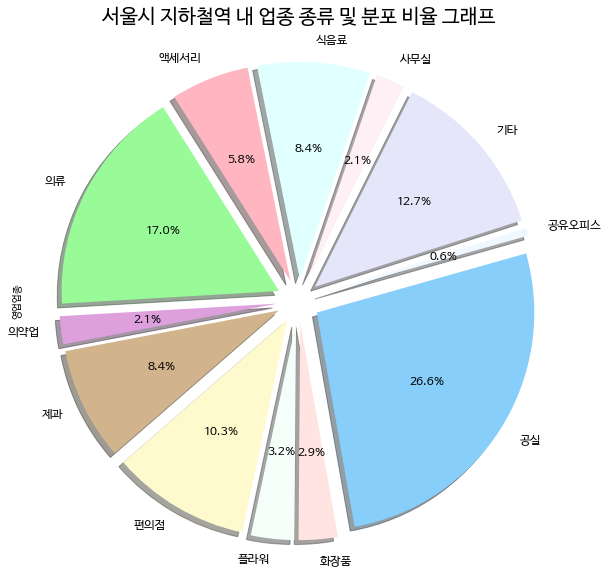

In [188]:
#서울시 지하철 역 내 업종 데이터프레임
data = ({'공실' : [422],
        '공유오피스' : [9],
        '기타' : [201],
       '사무실' : [34],
        '식음료' : [133],
         '액세서리' : [92],
         '의류' : [269],
       '의약업' : [33],
         '제과' : [133],
        '편의점' : [163],
       '플라워' : [51],
        '화장품' : [46]})
seoul_영업업종_ug_1 = pd.DataFrame(data=data, index=['영업업종'])
seoul_영업업종_ug_1 = seoul_영업업종_ug_1.transpose()
seoul_영업업종_ug_1


explode = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
colors = ['LightskyBlue','AliceBlue','Lavender','LavenderBlush','LightCyan'
          ,'Lightpink','Palegreen','Plum','Tan','Lemonchiffon','MintCream','Mistyrose']

seoul_영업업종_ug_1['영업업종']['공실':'화장품'].plot(kind='pie',fontsize=(12), figsize=(12,10),startangle=280, autopct = '%1.1f%%',
                                shadow=True,explode=explode,colors=colors)
plt.title('서울시 지하철역 내 업종 종류 및 분포 비율 그래프', fontsize=20)

## 1. 잠실역 분석 결과

In [189]:
ug_잠실역 = len(ug_공실_잠실)+len(ug_공유오피스_잠실)+len(ug_기타_잠실)+len(ug_사무실_잠실)+len(ug_식음료_잠실)+len(ug_액세서리_잠실)+len(ug_의류_잠실)+len(ug_의약업_잠실)+len(ug_제과_잠실)+len(ug_편의점_잠실)+len(ug_플라워_잠실)+len(ug_화장품_잠실)
ug_잠실역_1 = len(ug_공실_잠실)
ug_잠실역_2 = len(ug_공유오피스_잠실)
ug_잠실역_3 = len(ug_기타_잠실)
ug_잠실역_4 = len(ug_사무실_잠실)
ug_잠실역_5 = len(ug_식음료_잠실)
ug_잠실역_6 = len(ug_액세서리_잠실)
ug_잠실역_7 = len(ug_의류_잠실)
ug_잠실역_8 = len(ug_의약업_잠실)
ug_잠실역_9 = len(ug_제과_잠실)
ug_잠실역_10 = len(ug_편의점_잠실)
ug_잠실역_11 = len(ug_플라워_잠실)
ug_잠실역_12 = len(ug_화장품_잠실)


print("==== 잠실역의 12가지 영업 업종 상세정보 ====")
print('\n')
print(f"잠실역 상권의 총 개수 : {ug_잠실역} 개")
print(f"공실 개수 : {ug_잠실역_1} 개")
print(f"공유오피스 개수 : {ug_잠실역_2} 개")
print(f"기타 개수 : {ug_잠실역_3} 개")
print(f"사무실 개수 : {ug_잠실역_4} 개")
print(f"식음료 개수 : {ug_잠실역_5} 개")
print(f"액세서리 개수 : {ug_잠실역_6} 개")
print(f"의류 개수 : {ug_잠실역_7} 개")
print(f"의약업 개수 : {ug_잠실역_8} 개")
print(f"제과 개수 : {ug_잠실역_9} 개")
print(f"편의점 개수 : {ug_잠실역_10} 개")
print(f"플라워 개수 : {ug_잠실역_11} 개")
print(f"화장품 개수 : {ug_잠실역_12} 개")

==== 잠실역의 12가지 영업 업종 상세정보 ====


잠실역 상권의 총 개수 : 44 개
공실 개수 : 2 개
공유오피스 개수 : 0 개
기타 개수 : 6 개
사무실 개수 : 0 개
식음료 개수 : 15 개
액세서리 개수 : 2 개
의류 개수 : 7 개
의약업 개수 : 3 개
제과 개수 : 5 개
편의점 개수 : 2 개
플라워 개수 : 0 개
화장품 개수 : 2 개


In [190]:
data={'개수':[ug_잠실역_1,ug_잠실역_2,ug_잠실역_3,ug_잠실역_4,ug_잠실역_5,
            ug_잠실역_6,ug_잠실역_7,ug_잠실역_8,ug_잠실역_9,ug_잠실역_10,ug_잠실역_11,ug_잠실역_12]}

df_잠실역=pd.DataFrame(data,index=['공실','공유오피스','기타','사무실','식음료','액세서리','의류','의약업','제과','편의점','플라워','화장품'])
df_잠실역

,개수
공실,2
공유오피스,0
기타,6
사무실,0
식음료,15
액세서리,2
의류,7
의약업,3
제과,5
편의점,2


,개수
공실,2
기타,6
식음료,15
액세서리,2
의류,7
의약업,3
제과,5
편의점,2
화장품,2


Text(0.5, 1.0, '잠실역 역내 업종 종류 및 분포 비율 그래프')

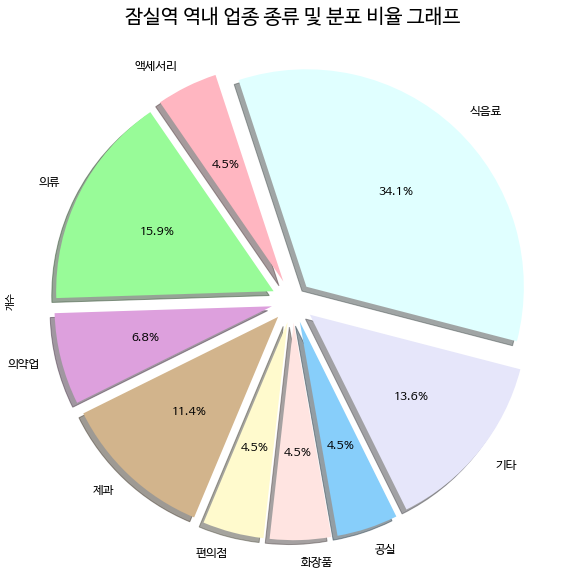

In [191]:
#업종이 0개인 행은 삭제
df_잠실역 = df_잠실역[df_잠실역['개수'] != 0]
df_잠실역
#index=['공실','기타','식음료','액세서리','의류','의약업','제과','편의점','화장품']

explode = [0.1,0.1,0.09,0.1,0.1,0.1,0.1,0.1,0.1]
colors = ['LightskyBlue','Lavender','LightCyan'
          ,'Lightpink','Palegreen','Plum','Tan','Lemonchiffon','Mistyrose']

df_잠실역['개수']['공실':'화장품'].plot(kind='pie',fontsize=(12), figsize=(12,10),startangle=280, autopct = '%1.1f%%',
                                shadow=True,explode=explode,colors=colors)
plt.title('잠실역 역내 업종 종류 및 분포 비율 그래프', fontsize=20)

## 2. 강남역 분석 결과

In [192]:
ug_강남역 = len(ug_공실_강남)+len(ug_공유오피스_강남)+len(ug_기타_강남)+len(ug_사무실_강남)+len(ug_식음료_강남)+len(ug_액세서리_강남)+len(ug_의류_강남)+len(ug_의약업_강남)+len(ug_제과_강남)+len(ug_편의점_강남)+len(ug_플라워_강남)+len(ug_화장품_강남)
ug_강남역_1 = len(ug_공실_강남)
ug_강남역_2 = len(ug_공유오피스_강남)
ug_강남역_3 = len(ug_기타_강남)
ug_강남역_4 = len(ug_사무실_강남)
ug_강남역_5 = len(ug_식음료_강남)
ug_강남역_6 = len(ug_액세서리_강남)
ug_강남역_7 = len(ug_의류_강남)
ug_강남역_8 = len(ug_의약업_강남)
ug_강남역_9 = len(ug_제과_강남)
ug_강남역_10 = len(ug_편의점_강남)
ug_강남역_11 = len(ug_플라워_강남)
ug_강남역_12 = len(ug_화장품_강남)


print("==== 강남역의 12가지 영업 업종 상세정보 ====")
print('\n')
print(f"강남역 상권의 총 개수 : {ug_강남역} 개")
print(f"공실 개수 : {ug_강남역_1} 개")
print(f"공유오피스 개수 : {ug_강남역_2} 개")
print(f"기타 개수 : {ug_강남역_3} 개")
print(f"사무실 개수 : {ug_강남역_4} 개")
print(f"식음료 개수 : {ug_강남역_5} 개")
print(f"액세서리 개수 : {ug_강남역_6} 개")
print(f"의류 개수 : {ug_강남역_7} 개")
print(f"의약업 개수 : {ug_강남역_8} 개")
print(f"제과 개수 : {ug_강남역_9} 개")
print(f"편의점 개수 : {ug_강남역_10} 개")
print(f"플라워 개수 : {ug_강남역_11} 개")
print(f"화장품 개수 : {ug_강남역_12} 개")

==== 강남역의 12가지 영업 업종 상세정보 ====


강남역 상권의 총 개수 : 6 개
공실 개수 : 2 개
공유오피스 개수 : 0 개
기타 개수 : 0 개
사무실 개수 : 0 개
식음료 개수 : 1 개
액세서리 개수 : 1 개
의류 개수 : 1 개
의약업 개수 : 0 개
제과 개수 : 0 개
편의점 개수 : 0 개
플라워 개수 : 0 개
화장품 개수 : 1 개


In [193]:
data={'개수':[ug_강남역_1,ug_강남역_2,ug_강남역_3,ug_강남역_4,ug_강남역_5,
            ug_강남역_6,ug_강남역_7,ug_강남역_8,ug_강남역_9,ug_강남역_10,ug_강남역_11,ug_강남역_12]}

df_강남역=pd.DataFrame(data,index=['공실','공유오피스','기타','사무실','식음료','액세서리','의류','의약업','제과','편의점','플라워','화장품'])
df_강남역

,개수
공실,2
공유오피스,0
기타,0
사무실,0
식음료,1
액세서리,1
의류,1
의약업,0
제과,0
편의점,0


,개수
공실,2
식음료,1
액세서리,1
의류,1
화장품,1


Text(0.5, 1.0, '강남역 역내 업종 종류 및 분포 비율 그래프')

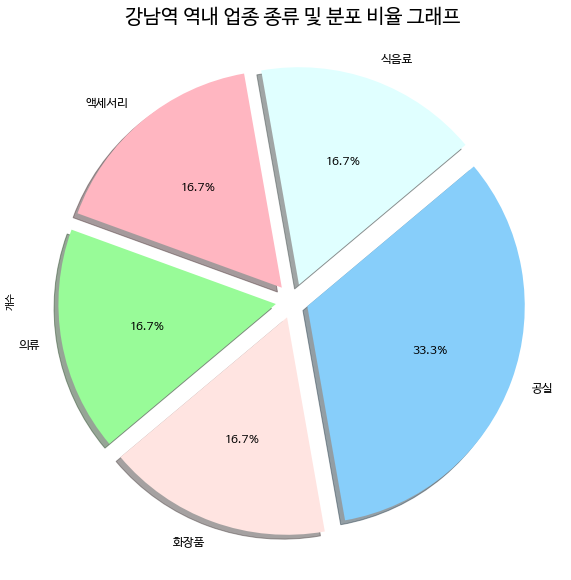

In [194]:
#업종이 0개인 행은 삭제
df_강남역 = df_강남역[df_강남역['개수'] != 0]
df_강남역
#index=['공실','식음료','액세서리','의류','화장품']
explode = [0.07,0.08,0.08,0.08,0.08]
colors = ['LightskyBlue','LightCyan','Lightpink','Palegreen','Mistyrose']

df_강남역['개수']['공실':'화장품'].plot(kind='pie',fontsize=(12), figsize=(12,10),startangle=280, autopct = '%1.1f%%',
                                shadow=True,explode=explode,colors=colors)
plt.title('강남역 역내 업종 종류 및 분포 비율 그래프', fontsize=20)

## 3. 홍대입구역 분석 결과

In [195]:
ug_홍대입구역 = len(ug_공실_홍대입구)+len(ug_공유오피스_홍대입구)+len(ug_기타_홍대입구)+len(ug_사무실_홍대입구)+len(ug_식음료_홍대입구)+len(ug_액세서리_홍대입구)+len(ug_의류_홍대입구)+len(ug_의약업_홍대입구)+len(ug_제과_홍대입구)+len(ug_편의점_홍대입구)+len(ug_플라워_홍대입구)+len(ug_화장품_홍대입구)
ug_홍대입구역_1 = len(ug_공실_홍대입구)
ug_홍대입구역_2 = len(ug_공유오피스_홍대입구)
ug_홍대입구역_3 = len(ug_기타_홍대입구)
ug_홍대입구역_4 = len(ug_사무실_홍대입구)
ug_홍대입구역_5 = len(ug_식음료_홍대입구)
ug_홍대입구역_6 = len(ug_액세서리_홍대입구)
ug_홍대입구역_7 = len(ug_의류_홍대입구)
ug_홍대입구역_8 = len(ug_의약업_홍대입구)
ug_홍대입구역_9 = len(ug_제과_홍대입구)
ug_홍대입구역_10 = len(ug_편의점_홍대입구)
ug_홍대입구역_11 = len(ug_플라워_홍대입구)
ug_홍대입구역_12 = len(ug_화장품_홍대입구)

print("==== 홍대입구역의 12가지 영업 업종 상세정보 ====")
print('\n')
print(f"홍대입구역 상권의 총 개수 : {ug_홍대입구역} 개")
print(f"공실 개수 : {ug_홍대입구역_1} 개")
print(f"공유오피스 개수 : {ug_홍대입구역_2} 개")
print(f"기타 개수 : {ug_홍대입구역_3} 개")
print(f"사무실 개수 : {ug_홍대입구역_4} 개")
print(f"식음료 개수 : {ug_홍대입구역_5} 개")
print(f"액세서리 개수 : {ug_홍대입구역_6} 개")
print(f"의류 개수 : {ug_홍대입구역_7} 개")
print(f"의약업 개수 : {ug_홍대입구역_8} 개")
print(f"제과 개수 : {ug_홍대입구역_9} 개")
print(f"편의점 개수 : {ug_홍대입구역_10} 개")
print(f"플라워 개수 : {ug_홍대입구역_11} 개")
print(f"화장품 개수 : {ug_홍대입구역_12} 개")

==== 홍대입구역의 12가지 영업 업종 상세정보 ====


홍대입구역 상권의 총 개수 : 8 개
공실 개수 : 0 개
공유오피스 개수 : 0 개
기타 개수 : 7 개
사무실 개수 : 0 개
식음료 개수 : 0 개
액세서리 개수 : 0 개
의류 개수 : 0 개
의약업 개수 : 0 개
제과 개수 : 0 개
편의점 개수 : 0 개
플라워 개수 : 0 개
화장품 개수 : 1 개


In [196]:
data={'개수':[ug_홍대입구역_1,ug_홍대입구역_2,ug_홍대입구역_3,ug_홍대입구역_4,ug_홍대입구역_5,
            ug_홍대입구역_6,ug_홍대입구역_7,ug_홍대입구역_8,ug_홍대입구역_9,ug_홍대입구역_10,ug_홍대입구역_11,ug_홍대입구역_12]}

df_홍대입구역=pd.DataFrame(data,index=['공실','공유오피스','기타','사무실','식음료','액세서리','의류','의약업','제과','편의점','플라워','화장품'])
df_홍대입구역

,개수
공실,0
공유오피스,0
기타,7
사무실,0
식음료,0
액세서리,0
의류,0
의약업,0
제과,0
편의점,0


,개수
기타,7
화장품,1


Text(0.5, 1.0, '홍대입구역 역내 업종 종류 및 분포 비율 그래프')

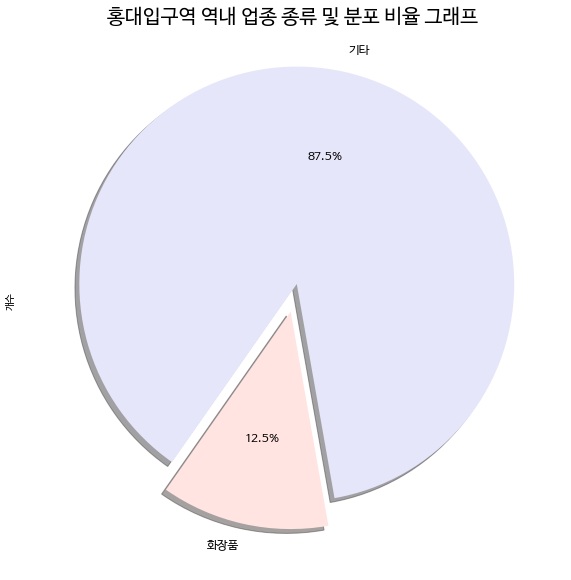

In [197]:
#업종이 0개인 행은 삭제
df_홍대입구역 = df_홍대입구역[df_홍대입구역['개수'] != 0]
df_홍대입구역
#index=['기타','화장품']
explode = [0.08,0.05]
colors = ['Lavender','Mistyrose']

df_홍대입구역['개수']['공실':'화장품'].plot(kind='pie',fontsize=(12), figsize=(12,10),startangle=280, autopct = '%1.1f%%',
                                shadow=True,explode=explode,colors=colors)
plt.title('홍대입구역 역내 업종 종류 및 분포 비율 그래프', fontsize=20)

## 4. 사당역 분석 결과

In [198]:
ug_사당역 = len(ug_공실_사당)+len(ug_공유오피스_사당)+len(ug_기타_사당)+len(ug_사무실_사당)+len(ug_식음료_사당)+len(ug_액세서리_사당)+len(ug_의류_사당)+len(ug_의약업_사당)+len(ug_제과_사당)+len(ug_편의점_사당)+len(ug_플라워_사당)+len(ug_화장품_사당)
ug_사당역_1 = len(ug_공실_사당)
ug_사당역_2 = len(ug_공유오피스_사당)
ug_사당역_3 = len(ug_기타_사당) 
ug_사당역_4 = len(ug_사무실_사당)
ug_사당역_5 = len(ug_식음료_사당)
ug_사당역_6 = len(ug_액세서리_사당)
ug_사당역_7 = len(ug_의류_사당)
ug_사당역_8 = len(ug_의약업_사당)
ug_사당역_9 = len(ug_제과_사당)
ug_사당역_10 = len(ug_편의점_사당)
ug_사당역_11 = len(ug_플라워_사당)
ug_사당역_12 = len(ug_화장품_사당)

print("==== 사당역의 12가지 영업 업종 상세정보 ====")
print('\n')
print(f"사당역 상권의 총 개수 : {ug_사당역} 개")
print(f"공실 개수 : {ug_사당역_1} 개")
print(f"공유오피스 개수 : {ug_사당역_2} 개")
print(f"기타 개수 : {ug_사당역_3} 개")
print(f"사무실 개수 : {ug_사당역_4} 개")
print(f"식음료 개수 : {ug_사당역_5} 개")
print(f"액세서리 개수 : {ug_사당역_6} 개")
print(f"의류 개수 : {ug_사당역_7} 개")
print(f"의약업 개수 : {ug_사당역_8} 개")
print(f"제과 개수 : {ug_사당역_9} 개")
print(f"편의점 개수 : {ug_사당역_10} 개")
print(f"플라워 개수 : {ug_사당역_11} 개")
print(f"화장품 개수 : {ug_사당역_12} 개")

==== 사당역의 12가지 영업 업종 상세정보 ====


사당역 상권의 총 개수 : 38 개
공실 개수 : 3 개
공유오피스 개수 : 0 개
기타 개수 : 6 개
사무실 개수 : 0 개
식음료 개수 : 6 개
액세서리 개수 : 7 개
의류 개수 : 10 개
의약업 개수 : 1 개
제과 개수 : 1 개
편의점 개수 : 1 개
플라워 개수 : 1 개
화장품 개수 : 2 개


In [199]:
data={'개수':[ug_사당역_1,ug_사당역_2,ug_사당역_3,ug_사당역_4,ug_사당역_5,
            ug_사당역_6,ug_사당역_7,ug_사당역_8,ug_사당역_9,ug_사당역_10,ug_사당역_11,ug_사당역_12]}

df_사당역=pd.DataFrame(data,index=['공실','공유오피스','기타','사무실','식음료','액세서리','의류','의약업','제과','편의점','플라워','화장품'])
df_사당역

,개수
공실,3
공유오피스,0
기타,6
사무실,0
식음료,6
액세서리,7
의류,10
의약업,1
제과,1
편의점,1


,개수
공실,3
기타,6
식음료,6
액세서리,7
의류,10
의약업,1
제과,1
편의점,1
플라워,1
화장품,2


Text(0.5, 1.0, '사당역 역내 업종 종류 및 분포 비율 그래프')

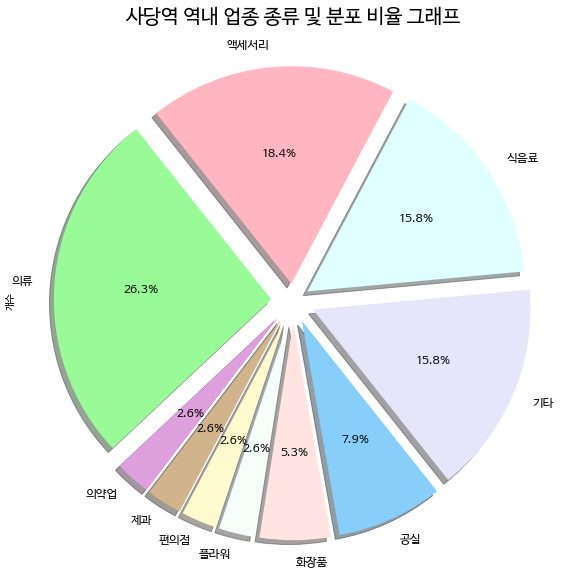

In [200]:
#업종이 0개인 행은 삭제
df_사당역 = df_사당역[df_사당역['개수'] != 0]
df_사당역
#index=['공실','기타','식음료','액세서리','의류','의약업','제과','편의점','플라워','화장품']
explode = [0.1,0.1,0.08,0.08,0.1,0.1,0.1,0.1,0.1,0.1]
colors = ['LightskyBlue','Lavender','LightCyan'
          ,'Lightpink','Palegreen','Plum','Tan','Lemonchiffon','MintCream','Mistyrose']

df_사당역['개수']['공실':'화장품'].plot(kind='pie',fontsize=(12), figsize=(12,10),startangle=280, autopct = '%1.1f%%',
                                shadow=True,explode=explode,colors=colors)
plt.title('사당역 역내 업종 종류 및 분포 비율 그래프', fontsize=20)

## 5. 고속터미널역 분석 결과

In [201]:
ug_고속터미널 = len(ug_공실_고속터미널)+len(ug_공유오피스_고속터미널)+len(ug_기타_고속터미널)+len(ug_사무실_고속터미널)+len(ug_식음료_고속터미널)+len(ug_액세서리_고속터미널)+len(ug_의류_고속터미널)+len(ug_의약업_고속터미널)+len(ug_제과_고속터미널)+len(ug_편의점_고속터미널)+len(ug_플라워_고속터미널)+len(ug_화장품_고속터미널)
ug_고속터미널_1 = len(ug_공실_고속터미널)
ug_고속터미널_2 = len(ug_공유오피스_고속터미널)
ug_고속터미널_3 = len(ug_기타_고속터미널)
ug_고속터미널_4 = len(ug_사무실_고속터미널)
ug_고속터미널_5 = len(ug_식음료_고속터미널)
ug_고속터미널_6 = len(ug_액세서리_고속터미널)
ug_고속터미널_7 = len(ug_의류_고속터미널)
ug_고속터미널_8 = len(ug_의약업_고속터미널)
ug_고속터미널_9 = len(ug_제과_고속터미널)
ug_고속터미널_10 = len(ug_편의점_고속터미널)
ug_고속터미널_11 = len(ug_플라워_고속터미널)
ug_고속터미널_12 = len(ug_화장품_고속터미널)

print("==== 고속터미널역의 12가지 영업 업종 상세정보 ====")
print('\n')
print(f"고속터미널역 상권의 총 개수 : {ug_고속터미널} 개")
print(f"공실 개수 : {ug_고속터미널_1} 개")
print(f"공유오피스 개수 : {ug_고속터미널_2} 개")
print(f"기타 개수 : {ug_고속터미널_3} 개")
print(f"사무실 개수 : {ug_고속터미널_4} 개")
print(f"식음료 개수 : {ug_고속터미널_5} 개")
print(f"액세서리 개수 : {ug_고속터미널_6} 개")
print(f"의류 개수 : {ug_고속터미널_7} 개")
print(f"의약업 개수 : {ug_고속터미널_8} 개")
print(f"제과 개수 : {ug_고속터미널_9} 개")
print(f"편의점 개수 : {ug_고속터미널_10} 개")
print(f"플라워 개수 : {ug_고속터미널_11} 개")
print(f"화장품 개수 : {ug_고속터미널_12} 개")

==== 고속터미널역의 12가지 영업 업종 상세정보 ====


고속터미널역 상권의 총 개수 : 58 개
공실 개수 : 2 개
공유오피스 개수 : 0 개
기타 개수 : 27 개
사무실 개수 : 0 개
식음료 개수 : 3 개
액세서리 개수 : 5 개
의류 개수 : 14 개
의약업 개수 : 1 개
제과 개수 : 1 개
편의점 개수 : 1 개
플라워 개수 : 0 개
화장품 개수 : 4 개


In [202]:
data={'개수':[ug_고속터미널_1,ug_고속터미널_2,ug_고속터미널_3,ug_고속터미널_4,ug_고속터미널_5,ug_고속터미널_6,
            ug_고속터미널_7,ug_고속터미널_8,ug_고속터미널_9,ug_고속터미널_10,ug_고속터미널_11,ug_고속터미널_12]}

df_고속터미널역=pd.DataFrame(data,index=['공실','공유오피스','기타','사무실','식음료','액세서리','의류','의약업','제과','편의점','플라워','화장품'])
df_고속터미널역

,개수
공실,2
공유오피스,0
기타,27
사무실,0
식음료,3
액세서리,5
의류,14
의약업,1
제과,1
편의점,1


,개수
공실,2
기타,27
식음료,3
액세서리,5
의류,14
의약업,1
제과,1
편의점,1
화장품,4


Text(0.5, 1.0, '고속터미널역 역내 업종 종류 및 분포 비율 그래프')

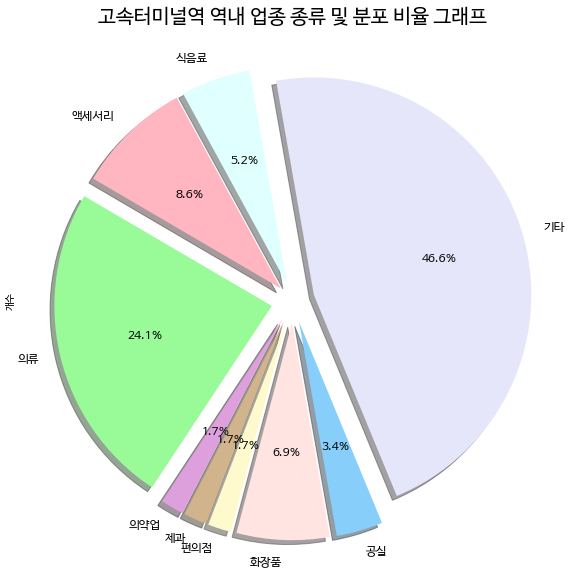

In [203]:
#업종이 0개인 행은 삭제
df_고속터미널역 = df_고속터미널역[df_고속터미널역['개수'] != 0]
df_고속터미널역
#index=['공실','기타','식음료','액세서리','의류','의약업','제과','편의점','화장품']
explode = [0.1,0.1,0.08,0.08,0.1,0.1,0.1,0.1,0.1]
colors = ['LightskyBlue','Lavender','LightCyan'
          ,'Lightpink','Palegreen','Plum','Tan','Lemonchiffon','Mistyrose']

df_고속터미널역['개수']['공실':'화장품'].plot(kind='pie',fontsize=(12), figsize=(12,10),startangle=280, autopct = '%1.1f%%',
                                shadow=True,explode=explode,colors=colors)
plt.title('고속터미널역 역내 업종 종류 및 분포 비율 그래프', fontsize=20)

## 6. 서울역 분석 결과

In [204]:
ug_서울 = len(ug_공실_서울)+len(ug_공유오피스_서울)+len(ug_기타_서울)+len(ug_사무실_서울)+len(ug_식음료_서울)+len(ug_액세서리_서울)+len(ug_의류_서울)+len(ug_의약업_서울)+len(ug_제과_서울)+len(ug_편의점_서울)+len(ug_플라워_서울)+len(ug_화장품_서울)
ug_서울_1 = len(ug_공실_서울)
ug_서울_2 = len(ug_공유오피스_서울)
ug_서울_3 = len(ug_기타_서울)
ug_서울_4 = len(ug_사무실_서울)
ug_서울_5 = len(ug_식음료_서울)
ug_서울_6 = len(ug_액세서리_서울)
ug_서울_7 = len(ug_의류_서울)
ug_서울_8 = len(ug_의약업_서울)
ug_서울_9 = len(ug_제과_서울)
ug_서울_10 = len(ug_편의점_서울)
ug_서울_11 = len(ug_플라워_서울)
ug_서울_12 = len(ug_화장품_서울)




print("==== 서울역의 12가지 영업 업종 상세정보 ====")
print('\n')
print(f"서울역 상권의 총 개수 : {ug_서울} 개")
print(f"공실 개수 : {ug_서울_1} 개")
print(f"공유오피스 개수 : {ug_서울_2} 개")
print(f"기타 개수 : {ug_서울_3} 개")
print(f"사무실 개수 : {ug_서울_4} 개")
print(f"식음료 개수 : {ug_서울_5} 개")
print(f"액세서리 개수 : {ug_서울_6} 개")
print(f"의류 개수 : {ug_서울_7} 개")
print(f"의약업 개수 : {ug_서울_8} 개")
print(f"제과 개수 : {ug_서울_9} 개")
print(f"편의점 개수 : {ug_서울_10} 개")
print(f"플라워 개수 : {ug_서울_11} 개")
print(f"화장품 개수 : {ug_서울_12} 개")

==== 서울역의 12가지 영업 업종 상세정보 ====


서울역 상권의 총 개수 : 1 개
공실 개수 : 0 개
공유오피스 개수 : 0 개
기타 개수 : 0 개
사무실 개수 : 1 개
식음료 개수 : 0 개
액세서리 개수 : 0 개
의류 개수 : 0 개
의약업 개수 : 0 개
제과 개수 : 0 개
편의점 개수 : 0 개
플라워 개수 : 0 개
화장품 개수 : 0 개


In [205]:
data={'개수':[ug_서울_1,ug_서울_2,ug_서울_3,ug_서울_4,ug_서울_5,ug_서울_6,
            ug_서울_7,ug_서울_8,ug_서울_9,ug_서울_10,ug_서울_11,ug_서울_12]}

df_서울역=pd.DataFrame(data,index=['공실','공유오피스','기타','사무실','식음료','액세서리','의류','의약업','제과','편의점','플라워','화장품'])
df_서울역


,개수
공실,0
공유오피스,0
기타,0
사무실,1
식음료,0
액세서리,0
의류,0
의약업,0
제과,0
편의점,0


,개수
사무실,1


Text(0.5, 1.0, '서울역 역내 업종 종류 및 분포 비율 그래프')

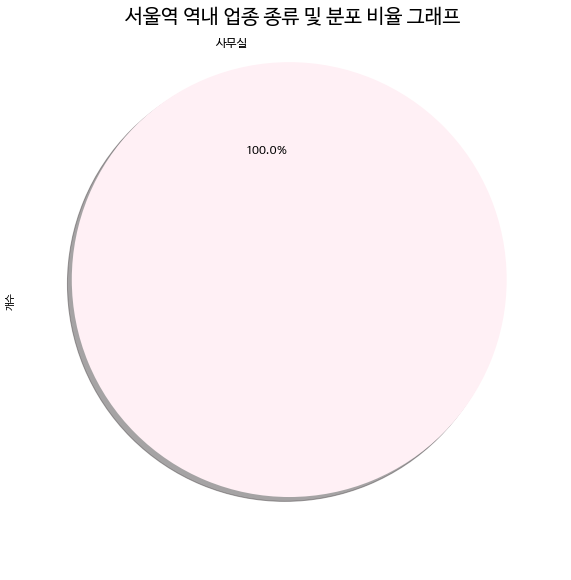

In [206]:
#업종이 0개인 행은 삭제
df_서울역 = df_서울역[df_서울역['개수'] != 0]
df_서울역
#index=['사무실']
explode = [0.1]
colors = ['LavenderBlush']

df_서울역['개수']['공실':'화장품'].plot(kind='pie',fontsize=(12), figsize=(12,10),startangle=280, autopct = '%1.1f%%',
                                shadow=True,explode=explode,colors=colors)
plt.title('서울역 역내 업종 종류 및 분포 비율 그래프', fontsize=20)

## 7. 신림역 분석 결과

In [207]:
ug_신림 = len(ug_공실_신림)+len(ug_공유오피스_신림)+len(ug_기타_신림)+len(ug_사무실_신림)+len(ug_식음료_신림)+len(ug_액세서리_신림)+len(ug_의류_신림)+len(ug_의약업_신림)+len(ug_제과_신림)+len(ug_편의점_신림)+len(ug_플라워_신림)+len(ug_화장품_신림)
ug_신림_1 = len(ug_공실_신림)
ug_신림_2 = len(ug_공유오피스_신림)
ug_신림_3 = len(ug_기타_신림)
ug_신림_4 = len(ug_사무실_신림)
ug_신림_5 = len(ug_식음료_신림)
ug_신림_6 = len(ug_액세서리_신림)
ug_신림_7 = len(ug_의류_신림)
ug_신림_8 = len(ug_의약업_신림)
ug_신림_9 = len(ug_제과_신림)
ug_신림_10 = len(ug_편의점_신림)
ug_신림_11 = len(ug_플라워_신림)
ug_신림_12 = len(ug_화장품_신림)




print("==== 신림역의 12가지 영업 업종 상세정보 ====")
print('\n')
print(f"신림역 상권의 총 개수 : {ug_신림} 개")
print(f"공실 개수 : {ug_신림_1} 개")
print(f"공유오피스 개수 : {ug_신림_2} 개")
print(f"기타 개수 : {ug_신림_3} 개")
print(f"사무실 개수 : {ug_신림_4} 개")
print(f"식음료 개수 : {ug_신림_5} 개")
print(f"액세서리 개수 : {ug_신림_6} 개")
print(f"의류 개수 : {ug_신림_7} 개")
print(f"의약업 개수 : {ug_신림_8} 개")
print(f"제과 개수 : {ug_신림_9} 개")
print(f"편의점 개수 : {ug_신림_10} 개")
print(f"플라워 개수 : {ug_신림_11} 개")
print(f"화장품 개수 : {ug_신림_12} 개")

==== 신림역의 12가지 영업 업종 상세정보 ====


신림역 상권의 총 개수 : 5 개
공실 개수 : 0 개
공유오피스 개수 : 0 개
기타 개수 : 0 개
사무실 개수 : 0 개
식음료 개수 : 2 개
액세서리 개수 : 1 개
의류 개수 : 0 개
의약업 개수 : 0 개
제과 개수 : 1 개
편의점 개수 : 0 개
플라워 개수 : 1 개
화장품 개수 : 0 개


In [208]:
data={'개수':[ug_신림_1,ug_신림_2,ug_신림_3,ug_신림_4,ug_신림_5,ug_신림_6,
            ug_신림_7,ug_신림_8,ug_신림_9,ug_신림_10,ug_신림_11,ug_신림_12]}

df_신림역=pd.DataFrame(data,index=['공실','공유오피스','기타','사무실','식음료','액세서리','의류','의약업','제과','편의점','플라워','화장품'])
df_신림역

,개수
공실,0
공유오피스,0
기타,0
사무실,0
식음료,2
액세서리,1
의류,0
의약업,0
제과,1
편의점,0


,개수
식음료,2
액세서리,1
제과,1
플라워,1


Text(0.5, 1.0, '신림역 역내 업종 종류 및 분포 비율 그래프')

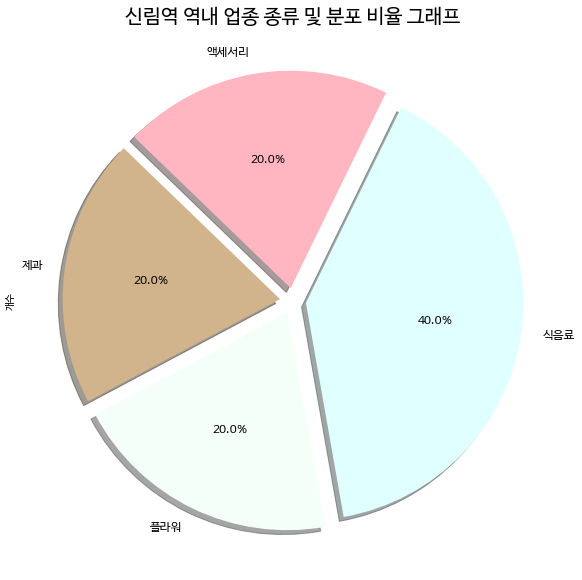

In [209]:
#업종이 0개인 행은 삭제
df_신림역 = df_신림역[df_신림역['개수'] != 0]
df_신림역
#index=['식음료','액세서리','제과','플라워']
explode = [0.06,0.06,0.06,0.06]
colors = ['LightCyan','Lightpink','Tan','MintCream']

df_신림역['개수']['공실':'화장품'].plot(kind='pie',fontsize=(12), figsize=(12,10),startangle=280, autopct = '%1.1f%%',
                                shadow=True,explode=explode,colors=colors)
plt.title('신림역 역내 업종 종류 및 분포 비율 그래프', fontsize=20)

## 8. 구로디지털단지역 분석 결과

In [210]:
ug_구로디단 = len(ug_공실_구로디단)+len(ug_공유오피스_구로디단)+len(ug_기타_구로디단)+len(ug_사무실_구로디단)+len(ug_식음료_구로디단)+len(ug_액세서리_구로디단)+len(ug_의류_구로디단)+len(ug_의약업_구로디단)+len(ug_제과_구로디단)+len(ug_편의점_구로디단)+len(ug_플라워_구로디단)+len(ug_화장품_구로디단)
ug_구로디단_1 = len(ug_공실_구로디단)
ug_구로디단_2 = len(ug_공유오피스_구로디단)
ug_구로디단_3 = len(ug_기타_구로디단)
ug_구로디단_4 = len(ug_사무실_구로디단)
ug_구로디단_5 = len(ug_식음료_구로디단)
ug_구로디단_6 = len(ug_액세서리_구로디단)
ug_구로디단_7 = len(ug_의류_구로디단)
ug_구로디단_8 = len(ug_의약업_구로디단)
ug_구로디단_9 = len(ug_제과_구로디단)
ug_구로디단_10 = len(ug_편의점_구로디단)
ug_구로디단_11 = len(ug_플라워_구로디단)
ug_구로디단_12 = len(ug_화장품_구로디단)

print("==== 구로디지털단지역의 12가지 영업 업종 상세정보 ====")
print('\n')
print(f"구로디지털단지역 상권의 총 개수 : {ug_구로디단} 개")
print(f"공실 개수 : {ug_구로디단_1} 개")
print(f"공유오피스 개수 : {ug_구로디단_2} 개")
print(f"기타 개수 : {ug_구로디단_3} 개")
print(f"사무실 개수 : {ug_구로디단_4} 개")
print(f"식음료 개수 : {ug_구로디단_5} 개")
print(f"액세서리 개수 : {ug_구로디단_6} 개")
print(f"의류 개수 : {ug_구로디단_7} 개")
print(f"의약업 개수 : {ug_구로디단_8} 개")
print(f"제과 개수 : {ug_구로디단_9} 개")
print(f"편의점 개수 : {ug_구로디단_10} 개")
print(f"플라워 개수 : {ug_구로디단_11} 개")
print(f"화장품 개수 : {ug_구로디단_12} 개")

==== 구로디지털단지역의 12가지 영업 업종 상세정보 ====


구로디지털단지역 상권의 총 개수 : 4 개
공실 개수 : 0 개
공유오피스 개수 : 0 개
기타 개수 : 0 개
사무실 개수 : 0 개
식음료 개수 : 1 개
액세서리 개수 : 0 개
의류 개수 : 1 개
의약업 개수 : 1 개
제과 개수 : 1 개
편의점 개수 : 0 개
플라워 개수 : 0 개
화장품 개수 : 0 개


In [211]:
data={'개수':[ug_구로디단_1,ug_구로디단_2,ug_구로디단_3,ug_구로디단_4,ug_구로디단_5,ug_구로디단_6,
            ug_구로디단_7,ug_구로디단_8,ug_구로디단_9,ug_구로디단_10,ug_구로디단_11,ug_구로디단_12]}

df_구로디단역=pd.DataFrame(data,index=['공실','공유오피스','기타','사무실','식음료','액세서리','의류','의약업','제과','편의점','플라워','화장품'])
df_구로디단역

,개수
공실,0
공유오피스,0
기타,0
사무실,0
식음료,1
액세서리,0
의류,1
의약업,1
제과,1
편의점,0


,개수
식음료,1
의류,1
의약업,1
제과,1


Text(0.5, 1.0, '구로디지털단지역 역내 업종 종류 및 분포 비율 그래프')

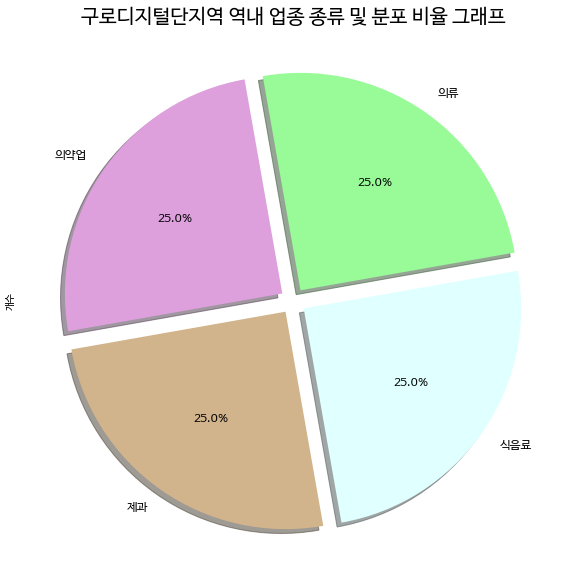

In [212]:
#업종이 0개인 행은 삭제
df_구로디단역 = df_구로디단역[df_구로디단역['개수'] != 0]
df_구로디단역
#index=['식음료','의류','의약업','제과']
explode = [0.06,0.06,0.06,0.06]
colors = ['LightCyan','Palegreen','Plum','Tan']

df_구로디단역['개수']['공실':'화장품'].plot(kind='pie',fontsize=(12), figsize=(12,10),startangle=280, autopct = '%1.1f%%',
                                shadow=True,explode=explode,colors=colors)
plt.title('구로디지털단지역 역내 업종 종류 및 분포 비율 그래프', fontsize=20)

## 9. 건대입구역 분석 결과

In [213]:
ug_건대입구 = len(ug_공실_건대입구)+len(ug_공유오피스_건대입구)+len(ug_기타_건대입구)+len(ug_사무실_건대입구)+len(ug_식음료_건대입구)+len(ug_액세서리_건대입구)+len(ug_의류_건대입구)+len(ug_의약업_건대입구)+len(ug_제과_건대입구)+len(ug_편의점_건대입구)+len(ug_플라워_건대입구)+len(ug_화장품_건대입구)
ug_건대입구_1 = len(ug_공실_건대입구)
ug_건대입구_2 = len(ug_공유오피스_건대입구)
ug_건대입구_3 = len(ug_기타_건대입구)
ug_건대입구_4 = len(ug_사무실_건대입구)
ug_건대입구_5 = len(ug_식음료_건대입구)
ug_건대입구_6 = len(ug_액세서리_건대입구)
ug_건대입구_7 = len(ug_의류_건대입구)
ug_건대입구_8 = len(ug_의약업_건대입구)
ug_건대입구_9 = len(ug_제과_건대입구)
ug_건대입구_10 = len(ug_편의점_건대입구)
ug_건대입구_11 = len(ug_플라워_건대입구)
ug_건대입구_12 = len(ug_화장품_건대입구)




print("==== 건대입구역의 12가지 영업 업종 상세정보 ====")
print('\n')
print(f"건대입구역 상권의 총 개수 : {ug_건대입구} 개")
print(f"공실 개수 : {ug_건대입구_1} 개")
print(f"공유오피스 개수 : {ug_건대입구_2} 개")
print(f"기타 개수 : {ug_건대입구_3} 개")
print(f"사무실 개수 : {ug_건대입구_4} 개")
print(f"식음료 개수 : {ug_건대입구_5} 개")
print(f"액세서리 개수 : {ug_건대입구_6} 개")
print(f"의류 개수 : {ug_건대입구_7} 개")
print(f"의약업 개수 : {ug_건대입구_8} 개")
print(f"제과 개수 : {ug_건대입구_9} 개")
print(f"편의점 개수 : {ug_건대입구_10} 개")
print(f"플라워 개수 : {ug_건대입구_11} 개")
print(f"화장품 개수 : {ug_건대입구_12} 개")

==== 건대입구역의 12가지 영업 업종 상세정보 ====


건대입구역 상권의 총 개수 : 17 개
공실 개수 : 6 개
공유오피스 개수 : 0 개
기타 개수 : 1 개
사무실 개수 : 0 개
식음료 개수 : 3 개
액세서리 개수 : 1 개
의류 개수 : 0 개
의약업 개수 : 1 개
제과 개수 : 2 개
편의점 개수 : 1 개
플라워 개수 : 2 개
화장품 개수 : 0 개


In [214]:
data={'개수':[ug_건대입구_1,ug_건대입구_2,ug_건대입구_3,ug_건대입구_4,ug_건대입구_5,
            ug_건대입구_6,ug_건대입구_7,ug_건대입구_8,ug_건대입구_9,ug_건대입구_10,ug_건대입구_11,ug_건대입구_12]}

df_건대입구역=pd.DataFrame(data,index=['공실','공유오피스','기타','사무실','식음료','액세서리','의류','의약업','제과','편의점','플라워','화장품'])
df_건대입구역

,개수
공실,6
공유오피스,0
기타,1
사무실,0
식음료,3
액세서리,1
의류,0
의약업,1
제과,2
편의점,1


,개수
공실,6
기타,1
식음료,3
액세서리,1
의약업,1
제과,2
편의점,1
플라워,2


Text(0.5, 1.0, '건대입구역 역내 업종 종류 및 분포 비율 그래프')

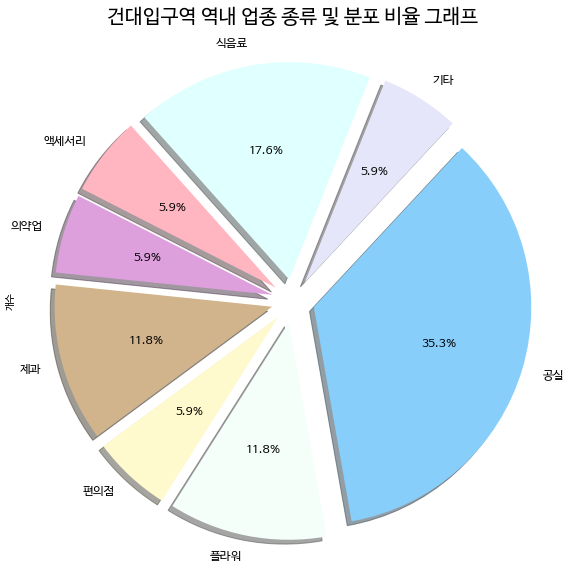

In [215]:
#업종이 0개인 행은 삭제
df_건대입구역 = df_건대입구역[df_건대입구역['개수'] != 0]
df_건대입구역
#index=['공실','기타','식음료','액세서리','의약업','제과','편의점','플라워']
explode = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
colors = ['LightskyBlue','Lavender','LightCyan','Lightpink','Plum','Tan','Lemonchiffon','MintCream']

df_건대입구역['개수']['공실':'화장품'].plot(kind='pie',fontsize=(12), figsize=(12,10),startangle=280, autopct = '%1.1f%%',
                                shadow=True,explode=explode,colors=colors)
plt.title('건대입구역 역내 업종 종류 및 분포 비율 그래프', fontsize=20)

## 10. 역삼역 분석 결과

In [216]:
ug_역삼 = len(ug_공실_역삼)+len(ug_공유오피스_역삼)+len(ug_기타_역삼)+len(ug_사무실_역삼)+len(ug_식음료_역삼)+len(ug_액세서리_역삼)+len(ug_의류_역삼)+len(ug_의약업_역삼)+len(ug_제과_역삼)+len(ug_편의점_역삼)+len(ug_플라워_역삼)+len(ug_화장품_역삼)
ug_역삼_1 = len(ug_공실_역삼)
ug_역삼_2 = len(ug_공유오피스_역삼)
ug_역삼_3 = len(ug_기타_역삼)
ug_역삼_4 = len(ug_사무실_역삼)
ug_역삼_5 = len(ug_식음료_역삼)
ug_역삼_6 = len(ug_액세서리_역삼)
ug_역삼_7 = len(ug_의류_역삼)
ug_역삼_8 = len(ug_의약업_역삼)
ug_역삼_9 = len(ug_제과_역삼)
ug_역삼_10 = len(ug_편의점_역삼)
ug_역삼_11 = len(ug_플라워_역삼)
ug_역삼_12 = len(ug_화장품_역삼)




print("==== 역삼역의 12가지 영업 업종 상세정보 ====")
print('\n')
print(f"역삼역 상권의 총 개수 : {ug_역삼} 개")
print(f"공실 개수 : {ug_역삼_1} 개")
print(f"공유오피스 개수 : {ug_역삼_2} 개")
print(f"기타 개수 : {ug_역삼_3} 개")
print(f"사무실 개수 : {ug_역삼_4} 개")
print(f"식음료 개수 : {ug_역삼_5} 개")
print(f"액세서리 개수 : {ug_역삼_6} 개")
print(f"의류 개수 : {ug_역삼_7} 개")
print(f"의약업 개수 : {ug_역삼_8} 개")
print(f"제과 개수 : {ug_역삼_9} 개")
print(f"편의점 개수 : {ug_역삼_10} 개")
print(f"플라워 개수 : {ug_역삼_11} 개")
print(f"화장품 개수 : {ug_역삼_12} 개")

==== 역삼역의 12가지 영업 업종 상세정보 ====


역삼역 상권의 총 개수 : 10 개
공실 개수 : 2 개
공유오피스 개수 : 0 개
기타 개수 : 0 개
사무실 개수 : 0 개
식음료 개수 : 3 개
액세서리 개수 : 0 개
의류 개수 : 1 개
의약업 개수 : 3 개
제과 개수 : 1 개
편의점 개수 : 0 개
플라워 개수 : 0 개
화장품 개수 : 0 개


In [217]:
data={'개수':[ug_역삼_1,ug_역삼_2,ug_역삼_3,ug_역삼_4,ug_역삼_5,
            ug_역삼_6,ug_역삼_7,ug_역삼_8,ug_역삼_9,ug_역삼_10,ug_역삼_11,ug_역삼_12]}

df_역삼역=pd.DataFrame(data,index=['공실','공유오피스','기타','사무실','식음료','액세서리','의류','의약업','제과','편의점','플라워','화장품'])
df_역삼역

,개수
공실,2
공유오피스,0
기타,0
사무실,0
식음료,3
액세서리,0
의류,1
의약업,3
제과,1
편의점,0


,개수
공실,2
식음료,3
의류,1
의약업,3
제과,1


Text(0.5, 1.0, '역삼역 역내 업종 종류 및 분포 비율 그래프')

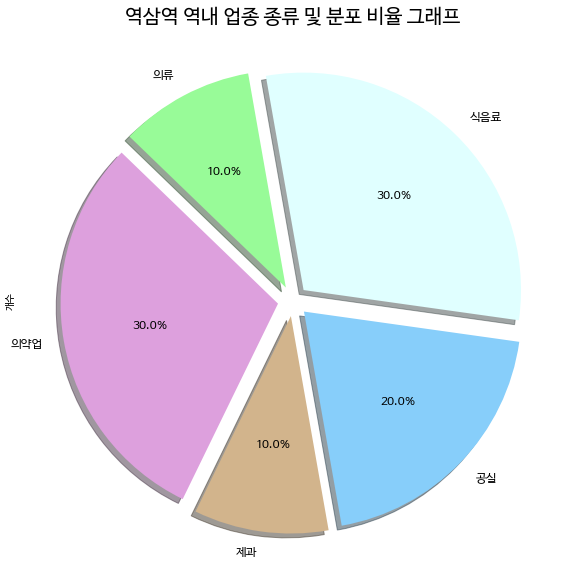

In [218]:
#업종이 0개인 행은 삭제
df_역삼역 = df_역삼역[df_역삼역['개수'] != 0]
df_역삼역
#index=['공실','식음료','의류','의약업','제과']

explode = [0.07,0.07,0.07,0.07,0.07]
colors = ['LightskyBlue','LightCyan','Palegreen','Plum','Tan']

df_역삼역['개수']['공실':'화장품'].plot(kind='pie',fontsize=(12), figsize=(12,10),startangle=280, autopct = '%1.1f%%',
                                shadow=True,explode=explode,colors=colors)
plt.title('역삼역 역내 업종 종류 및 분포 비율 그래프', fontsize=20)

## 11. 서울시 지하철역 면적당 월임대료 평균 : Top10 역 비교

<ipython-input-219-8e0eb0364074>:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  ug1_잠실_면적당임대료 = ug_1[ug_1['역사명'].str.contains('잠실()', na = False)]
<ipython-input-219-8e0eb0364074>:16: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  ug1_사당_면적당임대료 = ug_1[ug_1['역사명'].str.contains('사당()', na = False)]
<ipython-input-219-8e0eb0364074>:20: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  ug1_고속터미널_면적당임대료 = ug_1[ug_1['역사명'].str.contains('고속터미널()', na = False)]
<ipython-input-219-8e0eb0364074>:36: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  ug1_건대입구_면적당임대료 = ug_1[ug_1['역사명'].str.contains('건대입구()', na = False)]
<ipython-input-219-8e0eb0364074>:40: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  ug1_역삼_면적당임대료 = ug_1[ug_1['역사명'].str.contains('역삼()', na = False)]


,면적당 월 임대료
잠실,1391644.13
강남,629534.83
홍대입구,452119.00
사당,244415.32
고속터미널,144945.66
서울,15973.00
신림,503797.00
구로디단,298794.25
건대입구,215629.53
역삼,248655.90


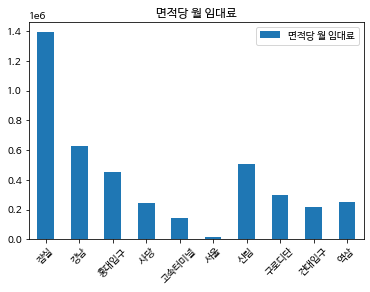

In [219]:
pd.options.display.float_format = '{:.2f}'.format

# 잠실
ug1_잠실_면적당임대료 = ug_1[ug_1['역사명'].str.contains('잠실()', na = False)]
a = ug1_잠실_면적당임대료['면적당 월임대료'].mean()

# 강남
ug1_강남_면적당임대료 = ug_1[ug_1['역사명'] == '강남역']
b = ug1_강남_면적당임대료['면적당 월임대료'].mean()

# 홍대입구
ug1_홍대입구_면적당임대료 = ug_1[ug_1['역사명'] == '홍대입구역']
c = ug1_홍대입구_면적당임대료['면적당 월임대료'].mean()

# 사당
ug1_사당_면적당임대료 = ug_1[ug_1['역사명'].str.contains('사당()', na = False)]
d = ug1_사당_면적당임대료['면적당 월임대료'].mean()

# 고속터미널
ug1_고속터미널_면적당임대료 = ug_1[ug_1['역사명'].str.contains('고속터미널()', na = False)]
e = ug1_고속터미널_면적당임대료['면적당 월임대료'].mean()

# 서울
ug1_서울_면적당임대료 = ug_1[ug_1['역사명'] == '서울(1)역']
f = ug1_서울_면적당임대료['면적당 월임대료'].mean()

# 신림
ug1_신림_면적당임대료 = ug_1[ug_1['역사명'] == '신림역']
g = ug1_신림_면적당임대료['면적당 월임대료'].mean()

# 구로디단
ug1_구로디단_면적당임대료 = ug_1[ug_1['역사명'] == '구로디지털단지역']
h = ug1_구로디단_면적당임대료['면적당 월임대료'].mean()

# 건대입구
ug1_건대입구_면적당임대료 = ug_1[ug_1['역사명'].str.contains('건대입구()', na = False)]
i = ug1_건대입구_면적당임대료['면적당 월임대료'].mean()

# 역삼
ug1_역삼_면적당임대료 = ug_1[ug_1['역사명'].str.contains('역삼()', na = False)]
j = ug1_역삼_면적당임대료['면적당 월임대료'].mean()

index = ['잠실', '강남', '홍대입구', ' 사당', '고속터미널', '서울', '신림', '구로디단', '건대입구','역삼']
df = pd.DataFrame([a,b,c,d,e,f,g,h,i,j], index = index, columns = ['면적당 월 임대료'])
df
df_plot_bar = df.plot.bar(subplots=True,y='면적당 월 임대료',rot = 45)

In [220]:
ug_3 = ug_1[['연번','상가유형','호선','역사명','영업업종', '면적(제곱미터)', '월임대료']]

In [221]:
ug_3['영업업종'] = ug_3['영업업종'].fillna('공실')
ug_3

<ipython-input-221-f6bd32ec1ae8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ug_3['영업업종'] = ug_3['영업업종'].fillna('공실')


,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료
0,1,개별(일반),1,서울(1)역,사무실,33.00,527100.00
1,2,개별(일반),1,시청(1)역,의류,30.00,3858954.00
2,3,개별(일반),1,시청(1)역,기타,58.00,1858300.00
3,4,개별(일반),1,시청(1)역,플라워,25.00,2470600.00
4,5,네트워크,1,시청(1)역,식음료,25.00,4145884.00
...,...,...,...,...,...,...,...
1581,1582,개별(일반),8,단대오거리역,식음료,54.00,7630000.00
1582,1583,개별(일반),8,단대오거리역,의류,75.00,3780000.00
1583,1584,네트워크,8,신흥역,편의점,40.00,6124682.00
1584,1585,네트워크,8,수진역,편의점,40.00,5575875.00


In [222]:
#면적당 임대료 칼럼 추가

ug_3[['면적(제곱미터)', '월임대료']] = ug_3[['면적(제곱미터)', '월임대료']].apply(pd.to_numeric)

ug_3['1면적당 월임대료']=(ug_3['월임대료']/ug_3['면적(제곱미터)'])

ug_3.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,연번,상가유형,호선,역사명,영업업종,면적(제곱미터),월임대료,1면적당 월임대료
0,1,개별(일반),1,서울(1)역,사무실,33.00,527100.00,15972.73
1,2,개별(일반),1,시청(1)역,의류,30.00,3858954.00,128631.80
2,3,개별(일반),1,시청(1)역,기타,58.00,1858300.00,32039.66
3,4,개별(일반),1,시청(1)역,플라워,25.00,2470600.00,98824.00
4,5,네트워크,1,시청(1)역,식음료,25.00,4145884.00,165835.36


In [223]:
# 역별 임대료 평균 DataFrame 구하기

ug_g=ug_3.groupby(['호선', '역사명'])
type(ug_g)
pd.options.display.float_format = '{:.2f}'.format
cost=ug_g['면적(제곱미터)','월임대료','1면적당 월임대료'].agg('mean')

# 면적당 임대료 높은 순서로 내림차순
cost = cost.sort_values('1면적당 월임대료',ascending=False)
cost

pandas.core.groupby.generic.DataFrameGroupBy

<ipython-input-223-04aba56ecb78>:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cost=ug_g['면적(제곱미터)','월임대료','1면적당 월임대료'].agg('mean')


면적(제곱미터)         월임대료  1면적당 월임대료
호선 역사명                                        
5  천호(5)역        70.30 217793378.00 5505697.57
   오목교역          46.93  94251869.98 3530695.16
8  잠실(8)역        80.00  81977500.00 2651496.07
2  강남역           30.67  17193025.67  631259.21
   영등포구청(2)역     23.57  13889165.00  610959.07
...                ...          ...        ...
1  서울(1)역        33.00    527100.00   15972.73
2  신정네거리역        42.00          NaN        NaN
   이대역           21.67          NaN        NaN
4  한성대입구역        69.00          NaN        NaN
6  버티고개역         26.00          NaN        NaN

[236 rows x 3 columns]

In [224]:
#승하차 인원이 많은 top10역 역별 임대료 DataFrame

#1위 잠실
cost_잠실=(cost.loc[(8,'잠실(8)역')]+cost.loc[(2,'잠실(2)역')])/2

#2위 강남
cost_강남=cost.loc[(2,'강남역')]

#3위 홍대입구
cost_홍대입구=cost.loc[(2,'홍대입구역')]

#4위 사당
cost_사당=(cost.loc[(2,'사당(2)역')]+cost.loc[(4,'사당(4)역')])/2


#5위 서울
cost_서울=cost.loc[(1,'서울(1)역')]


#6위 고속터미널
cost_고속터미널=(cost.loc[(3,'고속터미널(3)역')]+cost.loc[(7,'고속터미널(7)역')])/2


#7위 신림
cost_신림=cost.loc[(2,'신림역')]


#8위 구로디지털단지
cost_구로디지털단지=cost.loc[(2,'구로디지털단지역')]


#9위 건대입구
cost_건대입구=(cost.loc[(7,'건대입구(7)역')]+cost.loc[(2,'건대입구(2)역')])/2

#10위 역삼
cost_역삼=cost.loc[(2,'역삼역')]



index=['잠실역','강남역','홍대입구역','사당역','서울역','고속터미널역','신림역','구로디지털단지역','건대입구역','역삼역']

cost_10=pd.DataFrame(data=[cost_잠실,cost_강남,cost_홍대입구,cost_사당,cost_서울,cost_고속터미널,cost_신림,cost_구로디지털단지,cost_건대입구,cost_역삼],index=index)
cost_10.reset_index(inplace=True)
cost_10

,index,면적(제곱미터),월임대료,1면적당 월임대료
0,잠실역,53.42,44521322.81,1499834.80
1,강남역,30.67,17193025.67,631259.21
2,홍대입구역,26.50,11078998.75,452411.00
3,사당역,62.23,10740755.19,286054.41
4,서울역,33.00,527100.00,15972.73
5,고속터미널역,730.13,46347414.53,164550.30
6,신림역,13.20,6521064.60,503796.82
7,구로디지털단지역,61.00,10628779.00,293834.34
8,건대입구역,90.20,9660355.42,215841.60
9,역삼역,68.60,10936655.80,250410.57


Text(0.5, 0, '1면적당 월임대료')

Text(0, 0.5, '빈도')

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


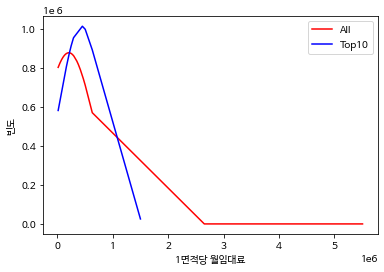

In [225]:
#서울시 지하철역과 Top10 지하철역 비교
cost_mean = np.mean(cost["1면적당 월임대료"]) 
cost_std = np.std(cost["1면적당 월임대료"])   

cost_10_mean = np.mean(cost_10["1면적당 월임대료"]) 
cost_10_std = np.std(cost_10["1면적당 월임대료"]) 

cost_pdf = stats.norm.pdf(cost["1면적당 월임대료"].sort_values(ascending=True), cost_mean, cost_std)  
cost_10_pdf = stats.norm.pdf(cost_10["1면적당 월임대료"].sort_values(ascending=True), cost_10_mean, cost_10_std)  

plt.plot(cost["1면적당 월임대료"].sort_values(), cost_pdf, color="Red", label="All") #Tll : 모든 지하철역
plt.plot(cost_10["1면적당 월임대료"].sort_values(), cost_10_pdf, color="Blue", label="Top10") #Top10 : 승하차 인원 top10

plt.legend()
plt.xlabel("1면적당 월임대료", size=10)
plt.ylabel("빈도", size=10)